In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def plot_hedge_pnl(btc,date_list,pnl_list,pnl_list_half,pnl_asset_list):
    plt.figure(figsize=(20,5))

    plt.subplot(131)
    plt.plot(btc['Adj Close'])

    plt.xlabel('Date')
    plt.xticks(range(0,len(btc['Adj Close']),20),date_list[0:len(btc['Adj Close']):20],rotation=45)
    plt.ylabel('Price ($)')
    plt.title('BTC Price')




    plt.subplot(132)
    plt.plot(pnl_list,label='Long 2 BTC + Short 2 Swap',linewidth=0.8)
    plt.plot(pnl_asset_list,label='Long 2 BTC',linewidth=0.5)
    #if the length of pnl_list is shorter than pnl_asset_list, then fill the area with grey color on the right side of the end of pnl_list with a rectangle with teh same height of all graph
    if(len(pnl_list)<len(pnl_asset_list)):
        plt.fill_between(range(len(pnl_list),len(pnl_asset_list)),min(pnl_list),max(pnl_list),facecolor='grey',alpha=0.2,label='Settled')
    plt.xlabel('Date')
    plt.xticks(range(0,len(pnl_asset_list),20),date_list[0:len(pnl_asset_list):20],rotation=45)
    plt.ylabel('PnL ($)')
    plt.title('PnL (hedge ratio=1)')
    plt.legend()


    plt.subplot(133)
    plt.plot(pnl_list_half,label='Long 2 BTC + Short 1 Swap',linewidth=0.8)
    plt.plot(pnl_asset_list,label='Long 2 BTC',linewidth=0.5)
    #if the length of pnl_list is shorter than pnl_asset_list, then fill the area with grey color on the right side of the end of pnl_list with a rectangle with teh same height of all graph
    if(len(pnl_list_half)<len(pnl_asset_list)):
        plt.fill_between(range(len(pnl_list_half),len(pnl_asset_list)),min(pnl_list_half),max(pnl_list_half),facecolor='grey',alpha=0.2,label='Settled')
    plt.xlabel('Date')
    plt.xticks(range(0,len(pnl_asset_list),20),date_list[0:len(pnl_asset_list):20],rotation=45)
    plt.ylabel('PnL ($)')
    plt.title('PnL (hedge ratio=0.5)')
    plt.legend()
    plt.show()

In [7]:
btc=pd.read_csv('BTC-USD.csv')
btc2=pd.read_csv('BTC-USD2.csv')
date_list=btc['Date'].to_list()
date_list2=btc2['Date'].to_list()
btc_list=btc['Adj Close'].to_list()
with open('btc_list.txt','w') as f:
    f.write('['+str(int(btc_list[0])))
    for i in btc_list:
        f.write(','+str(int(i)))
    f.write(']')

In [8]:
pnl_history1=(10000000000000000000,0,-5712,-67953020134236268,1191438335631643544,-762141967621417080,2882513661202173536,153855229779965165,5294013565319960384,5725820607337187268,16602698301930688876,45930069930069920122,136491022638563635050,247364460225767128810,352004420111507364832,-39826086956521742640,117786877394636000277,-3434456044215593098,-202781343036718494448,156329659706109831100,672767713174618233728,53902892926442042193,-30791061158185885760,114817781690140839482,-163955873375773952128,255459533486481712946,-47741488947527789976,25592393192080571630,-26283993413640682540,413326212496200755616,-561720030285185494480,162721978984238188999,328810752409352168780,-150798465624077907272,-12833880107366536757,-68679431958718912490,-216146414641464153485,-107545197124809407560,271708260105448166976,-185494755845942246115,-616563930424168438754,-79984600577478339498,101676042677012606700,-39331504343850022156,9478612080044051216,195836023477622896400,1051013951395139522102,-432343604722919317185,558109977564238239950,49130063097903516091,-204295604886165335407,317869363258930396959,-259710177614885810516,-158547061712227859392,-150709690755746654629,-458026308097047641798,-13033796016898013950,218192017259978417831,-22962013496880437090,-219911147011308563771,281200846761999415178,-101547069271758455775,-649546325878594232982,-4617923262677774706,42025320985997407705,-3107644305772223372,-108684292656828218173,-252270039155677561796,-635511096786076064478,-64616019250601589229,157040669737950161000,594679817758821242261,1016495239814104602002,343598627929082121164,-243505293784854124375,430502564102564094408)
pnl_history2=(10000000000000000000,0,62999999999999988800,-9033976510067118134,184595719167815821772,-27381070983810708540,116441256830601086768,4076927614889991060,138647006782659980192,107862910303668585036,258301349150965344438,510965034965034969028,1003245511319281817525,1163682230112883564405,1243002210055753682416,-115913043478260881760,347893438697318010723,-9717228022107796549,-574390671518359257568,476164829853054915550,1926383856587309116864,127951446463221032485,-72395530579092954240,271408890845070431208,-379977936687886976064,608729766743240856473,-108870744473763906504,58796196596040297354,-60141996706820341270,949663106248100377808,-1214860015142592747240,380360989492119082930,748405376204676084390,-327399232812038953636,-28416940053683256654,-152339715979359456245,-484073207320732088220,-248772598562404692400,639854130052724083488,-417747377922971134527,-1428281965212084219377,-207992300288739169749,269838021338506303350,-101665752171925000184,24739306040022014704,509918011738811448200,2612506975697569761051,-900171802361459646781,1221054988782119119975,100565031548951745725,-416147802443082655540,660934681629465186065,-522855088807442893040,-327273530856113929696,-316354845377873339288,-978013154048523809300,-29516898008449006975,495096008629989197135,-50481006748440206784,-484955573505654293459,639600423380999719412,-221773534635879239625,-1437773162939297105310,-11308961631338887353,103012660492998692635,-7553822152886111686,-264342146328414097977,-627135019577838780898,-1672755548393038032239,-208308009625300804708,523520334868975090816,1828339908879410610049,2542247619907052301001,720799313964541060582,-492752646892427050000,892251282051282047204,3168557759859492255740,-638340735878642029800,1484452623771555729478,-381311826806476932708,571717218280692935175,-1223826086956521753453,1427352473724685967234,-1187111848374686738745,1395300621976484370,697661307921728383676,-1202234943202114731401,178976270312096969168,1501535866216810927272,-445264745308311008121,626092284093746664788,-94886473769225366517,-299945936433071683348,-576869995389907456180,529866498740554147984,12688121272365811795,-187527309507754559276,-167454607046070445075,30902417188898833409,542377858088524691325,1864048247626442673760,839129131255901795565,-139213494294691568645,376581173894289763375,124967202868515422405,-242926521239954077678,-4354937660795551065,-1262884710539336977350,1366489386992698256766,-2288586867125045247978,-821176982860315030340,-1367646840148698884628,752254986068338484042,-316929719236438166402,-92231597259976079325,1091674841053587650535,162459285689052175280,1487234149602420651319,-190977945916601633540,-131869802317655075008,28631701312910307256,-1685432793494601614234,829414153999501601360,463026847977684808642,-226867992829069846663,978070613928658080258,-905366357418568419336,-641169042347079987612,-1075949954312223249434,-50388820683180472070,-51759599392580800619,-868221896383186713000,-271314814814814812596,-27595135054469476768,201376866786140979950,362256591162272544272,-216622683142100598660,501398653646989181184,-788553398058252404176,80063431723315433830,330235961323912237282,-521582365734085293955,135100287818188622026,516435067595247830425,-1237909090909090894074,194353535353535338648,333413695422269235028,205289756353156931752,1680961999404496044225,-478735980060530524545,-60234096233555595392,-676133744855967069738,-555685366839340174223,593444572877437645046,-241840140922602680625,60982456140350893743,-1884880231571960634720,2002127717391304354926,-1240948050517659152255,223138925792370457316,-38439263618530244400,-863093466767371594249,120763336041158931900,-51645720894371622976,21730522739556794718,-1078691797206574592804,604903518548001928752,1013832381920550505464,250438978994948146450,-238880799698227079808,704898428007290419877,2038123421846486147915,2402276979560136975124,-166328138009125126752,1130810945439957204960,-214381984036488005780,-98992667277726870160,-304003116797900264486,604981302236463951520,-877870894160583951138,519622847836202895810,46525866316308099250,164359254519801811150,43695652173913055260,780981058131939896048,-555763673128771344290,-383933684244728208336,-880376712328767113372,625315757798655903884,-72603981280073821868,-175592202561732475253,352100725862583296010,299395607286118239380,-333665414761593748796,1576464907373893591084,-1680818210700216033786,-56625469769895180010,-66756560488529463173,-150841085655724147000,-418616188422623990144,82260148713826361808,-174750810684317847872,167267857142857147744,-197845626588203819534,451211615330355029036,-1314221646057705096064,72939299424184269277,181759434769220251600,-206443823669687259110,155962170489558360398,53019577748217871556,-116127776263796154700,-64444918872758317750,636899589462880609250,-754436394271272128872,38601728928681694200,-148743025567208158922,-45701864208571235066,-1427553198815521255,198427154712303299240,836702364633310492655,-294057450025197387160,-189763675112479279470,-45922593360290877727,25820389835697515085,-190830018697943215604,180462878218700900032,-341453278019586503210,-670700548508741837930,-2894071600292672749536,-846547592259225910293,64003646973012388064,126752414163090138610,-88737447019741106164,-126815916398713838751,544535361684145826981,-368800007566872221300,-156921680299671290177,-53107497984412786624,110222662257766850086,23166890260262921686,2209703784570596808222,-602173693511739449798,-1900049602520423489862,-178012687516871693800,92182170542635658444,137088719653626099724,-213490738957988378384,-44745350999535093870,-35232476046394361696,659614297363413973760,-457752477134146329970,-13582320015441045220,-85553002510137080072,-908800325178073726400,898657857086082204157,535795107033639124272,424868118041787412443,94775877011191090560,-55007516536380037952,-46724405299608560388,302157985980251737412,630019099947671398906,-109733673881886005480,-783799019607843151796,16490683931192832413,0,-443965499078219626960,57406078610603286906,-110793634496919914130,184392378990731206656,915940004553734050941,-152321157618148850519,77404481438816840179,1405641858567879250597,-636867848336490006670,-141007446422084995993,515739181158627744404,-538351451491060835070,739991063286521969962,30912259357331998592,-46383831521739135630,-494513692500447460103,-268276547148606033694,-721599284436493726221,-161617869236780423284,146136268500523243616,-1381095972005050542,411559733442537507797,1887495121322581841119,-147373750832778168640,-123098187576983973672,552531805987009327712,1368533688498903137562,339815511084158759198,108323584464202151514,4471562464575067506132,1220480112434262232111,907270493495767109156,-525277780998203004492,-373775881250731949948,271749093161107673229,-1512306022470592776)
pnl_asset=(10000000000000000000,0,126000000000000000000,-18000000000000000000,368000000000000000000,-54000000000000000000,230000000000000000000,8000000000000000000,272000000000000000000,210000000000000000000,500000000000000000000,976000000000000000000,1870000000000000000000,2080000000000000000000,2134000000000000000000,-192000000000000000000,578000000000000000000,-16000000000000000000,-946000000000000000000,796000000000000000000,3180000000000000000000,202000000000000000000,-114000000000000000000,428000000000000000000,-596000000000000000000,962000000000000000000,-170000000000000000000,92000000000000000000,-94000000000000000000,1486000000000000000000,-1868000000000000000000,598000000000000000000,1168000000000000000000,-504000000000000000000,-44000000000000000000,-236000000000000000000,-752000000000000000000,-390000000000000000000,1008000000000000000000,-650000000000000000000,-2240000000000000000000,-336000000000000000000,438000000000000000000,-164000000000000000000,40000000000000000000,824000000000000000000,4174000000000000000000,-1368000000000000000000,1884000000000000000000,152000000000000000000,-628000000000000000000,1004000000000000000000,-786000000000000000000,-496000000000000000000,-482000000000000000000,-1498000000000000000000,-46000000000000000000,772000000000000000000,-78000000000000000000,-750000000000000000000,998000000000000000000,-342000000000000000000,-2226000000000000000000,-18000000000000000000,164000000000000000000,-12000000000000000000,-420000000000000000000,-1002000000000000000000,-2710000000000000000000,-352000000000000000000,890000000000000000000,3062000000000000000000,4068000000000000000000,1098000000000000000000,-742000000000000000000,1354000000000000000000,4742000000000000000000,-916000000000000000000,2146000000000000000000,-542000000000000000000,816000000000000000000,-1736000000000000000000,2052000000000000000000,-1680000000000000000000,2000000000000000000,1000000000000000000000,-1710000000000000000000,258000000000000000000,2160000000000000000000,-630000000000000000000,890000000000000000000,-134000000000000000000,-424000000000000000000,-818000000000000000000,756000000000000000000,18000000000000000000,-266000000000000000000,-238000000000000000000,44000000000000000000,772000000000000000000,2638000000000000000000,1166000000000000000000,-192000000000000000000,520000000000000000000,172000000000000000000,-334000000000000000000,-6000000000000000000,-1740000000000000000000,1904000000000000000000,-3150000000000000000000,-1154000000000000000000,-1938000000000000000000,1082000000000000000000,-452000000000000000000,-132000000000000000000,1564000000000000000000,230000000000000000000,2102000000000000000000,-266000000000000000000,-184000000000000000000,40000000000000000000,-2354000000000000000000,1178000000000000000000,652000000000000000000,-318000000000000000000,1374000000000000000000,-1260000000000000000000,-900000000000000000000,-1520000000000000000000,-72000000000000000000,-74000000000000000000,-1242000000000000000000,-392000000000000000000,-40000000000000000000,292000000000000000000,524000000000000000000,-312000000000000000000,724000000000000000000,-1132000000000000000000,116000000000000000000,478000000000000000000,-752000000000000000000,196000000000000000000,748000000000000000000,-1782000000000000000000,284000000000000000000,486000000000000000000,298000000000000000000,2434000000000000000000,-680000000000000000000,-86000000000000000000,-966000000000000000000,-800000000000000000000,860000000000000000000,-348000000000000000000,88000000000000000000,-2718000000000000000000,2956000000000000000000,-1786000000000000000000,326000000000000000000,-56000000000000000000,-1258000000000000000000,178000000000000000000,-76000000000000000000,32000000000000000000,-1588000000000000000000,904000000000000000000,1502000000000000000000,366000000000000000000,-348000000000000000000,1030000000000000000000,2952000000000000000000,3400000000000000000000,-230000000000000000000,1566000000000000000000,-294000000000000000000,-136000000000000000000,-418000000000000000000,834000000000000000000,-1204000000000000000000,718000000000000000000,64000000000000000000,226000000000000000000,60000000000000000000,1072000000000000000000,-758000000000000000000,-526000000000000000000,-1210000000000000000000,866000000000000000000,-100000000000000000000,-242000000000000000000,486000000000000000000,412000000000000000000,-458000000000000000000,2170000000000000000000,-2284000000000000000000,-78000000000000000000,-92000000000000000000,-208000000000000000000,-578000000000000000000,114000000000000000000,-242000000000000000000,232000000000000000000,-274000000000000000000,626000000000000000000,-1816000000000000000000,102000000000000000000,254000000000000000000,-288000000000000000000,218000000000000000000,74000000000000000000,-162000000000000000000,-90000000000000000000,890000000000000000000,-1048000000000000000000,54000000000000000000,-208000000000000000000,-64000000000000000000,-2000000000000000000,278000000000000000000,1170000000000000000000,-408000000000000000000,-264000000000000000000,-64000000000000000000,36000000000000000000,-266000000000000000000,252000000000000000000,-476000000000000000000,-938000000000000000000,-4074000000000000000000,-1230000000000000000000,94000000000000000000,186000000000000000000,-130000000000000000000,-186000000000000000000,800000000000000000000,-538000000000000000000,-230000000000000000000,-78000000000000000000,162000000000000000000,34000000000000000000,3242000000000000000000,-860000000000000000000,-2732000000000000000000,-262000000000000000000,136000000000000000000,202000000000000000000,-314000000000000000000,-66000000000000000000,-52000000000000000000,974000000000000000000,-670000000000000000000,-20000000000000000000,-126000000000000000000,-1340000000000000000000,1342000000000000000000,790000000000000000000,622000000000000000000,138000000000000000000,-80000000000000000000,-68000000000000000000,440000000000000000000,914000000000000000000,-158000000000000000000,-1130000000000000000000,24000000000000000000,0,-646000000000000000000,84000000000000000000,-162000000000000000000,270000000000000000000,1338000000000000000000,-220000000000000000000,112000000000000000000,2032000000000000000000,-906000000000000000000,-202000000000000000000,740000000000000000000,-768000000000000000000,1062000000000000000000,44000000000000000000,-66000000000000000000,-704000000000000000000,-384000000000000000000,-1036000000000000000000,-234000000000000000000,212000000000000000000,-2000000000000000000,596000000000000000000,2720000000000000000000,-208000000000000000000,-174000000000000000000,782000000000000000000,1926000000000000000000,472000000000000000000,150000000000000000000,6186000000000000000000,1630000000000000000000,1202000000000000000000,-692000000000000000000,-494000000000000000000,360000000000000000000,-2000000000000000000)

pnl_history1_2=(0,0,-9040,12777146477980749818,29657238796332182586,181484280018301868700,77295921412013097600,336199165894346645620,-51914430781817756561,-50781587712361906342,24802557801054614648,-256359723583845430415,-281292336492336499989,230942501535871097984,-121540231504308426984,-16602983827931034721,13367116751974437562,183076983740403129250,-32165680473372787250,158170666666666672384,302907627443464932560,1454588888888888881429,879051101297418879430,-900335483870967748564,-237786966589480621626,-180586020625306941882,59244682578340627152,-168160425485726678090,-366956109645107418592,-185544569129790390768,110656458125753822522,-291650394282248058519,-124355169815243093206,826828743256846390512,-117355921195063854042,-2463910857511977183500,17589108433734916567,-292651963031780083204,-355148165613505644800,-48776824817518221236,-35584568656784081656,116739771753349279950,219080362676460456528,40581837904119574784,12109364643499676926,-101202502547574476126,-476395998685013837625,85705171060011203839,580090307317849903514,179149637377275655880,-35191206595053706730,637591545785354675536,653107127058884736725,-693185219150370857126,486130700517160324032,-577222222222222221904,-430461650840029215540,47097873208547970415,612662114819076822375,-2901899705640563239354,-241537888083717298406,64605672543626295596,252318823422274846422,817356010459117554608,-114898280399621829000,412617563451776634186,172223066711783230794,-341348326414796895787,-1499316157678705118324,691566861988471235886,268991404011461324118,-50426354590916107544,476301151552539591751,-944480910988401271052,132635506479100473388,-766085718643550773526,61067787959069599758,-279590241996532453925,-109531590153345605480,245685138658449888424,53076829830048216477,-412207756165250609544,-134338354029935338260,-238738785787559436560,-65772884440400359820,-22881573013439150000,-332203146067415765260,-11393763348996132496,-7980224070616186980,3752786263562619370,40413752071735146004,-70093723922877585500,25075733022190530256,-46373506584110934323,-8971519600456358858,48701814593968522190,219765953243332202304,-61591445632551012438,233847228926740667305,-126398420318301132126,131821794212519304833,697353235245338447114,-250398016244528240795,-391447205123732125120,389939270271583329635,-239895730562163530701,45380465070401693952,254378389075796560552,-445498036055997580848,-227176799098613619670,38145246012240363584,258435925943829467362,278043427838231290680,101574433819828885172,7060730385453069877,-411797258608021468910,836459933758465576193,-564344308313875708150,-228981932162788923528,463165061725291041153,420830117330156194052,-399260751975393760913,-28751462216330054982,370282280879337664500,-1025447841059602661400,1256815154415839577550,325051811346548191120,348345948945615984103,989874651418269914465,3011151296279984748512,-833452601003432813852,2241061440268196776416,-143851949129112528863,-302874926842703199800,-1028149711436669766499,-1406753264011162418890,1510160229995208440430,-672085727680664374150,1934593590797041891920,-2105278830083565464248,1276796727584614376400,-293750136986301374240,-1105212965479749915669,1402874055997097908938,-711630765001030996370,113092766818411722936,361719775387321573640,805559845559845541570,-248998008872742502288,-826558756160199893440,-2826131499405671604848,-66403580659396072336,1992749245093105176619,-801940736266317659202,862447697508779995752,-154975491516294112232,-88575757575757570752,-1740782451681936740520,223649346509403887195,998598683999358052064,119124644204673342646,1200033210454651113672,924936835952274519560,2177922990126939352916,6684859128615200654571,629778894472361814320,-839924344771683320220,4875489455963140163315,-241151072076934400388,3866016315763763380124,-4631180943366461588256,-121453607745827862343,-291922617602796255480,1883500531144374701356,-3043328363436233554805,-368389471188048380555,-675361970703216987350,1156859826992837887861,740422123935891946680,1182802507836990589640,475685996055226818608,878058097890966968872,1452641528507885172743,79636618402615598112,-162604718844194993506,-2748129346530548792441,111280213533685933220,-975093412580485396736,-2876511777301927187170,-226335074178490560273,332036721733928486480,1769248610596517244620,2289083413231064233300,1795919078617926881051,-2609812865497076021100,-970534138135760937116,-703995235548641156244,-912353618736801683410,1027829731005191120438,-4418243611338370470155,-2026391283077607274948,328267647184573942114,141060221256080237268,952762907960628558378,547506207625253138285,-323331760516358777775,2768463532221681645929,300702214315809166925,-4211297801214746442830,-1971411077191452240195,77999999999999978328,296969921021677042000,650118363205951976176,45911895783339042320,702495667839066662990,283876403516406989928,469704981178324445700,-1459293327441449409089,687209927433552311913,-460881494708418606100,-1341098079827400234747,1293684321055063224732,-1657807459851493711350,-19826283041717107558,-881529824268481028626,-41984099663961973272,200009007533573531422,351672437189029150248,493714782896917466848,1092328769417577352410,256710777801585600744,4923900568671376887958,-742233175264645318144,-922173296796749490278,330330825671031858154,-319416767922235727224,323208286882199920540,-503823790605281605600,3236596296296296283680,592921421520236937047,1172508856843470877376,-1948987561174551392571,1352110065526925169744,-712888462315619319388,-215041747718090673249,432684652456898698070,380312384195503020744,-432585316659943533448,482317622335634952792,2743503937007874016665,-1387545469023729892530,-114820528771384145082,-6020856122924103680535,-735718160984051242720,-213517896678966795342,-1431036519821764900390,4694267679928475640832,148447970043358287751,1464384170742552251289,-201709050302015117796,-1002374064333400771540,1938865404680280223365,-363909058138936104440,1883428980761358988420,1045741450502911589279,-2721127298215344790685,337883686189666714347,1059236150696999530855,409897555050958450458,-1290424422933730453642,331699927166788039090,-945056619570905269830,-427696901060434477041,407913554386144184926,346080489938757640480,787513670256835142500,-1741621298046628859355,-2039333333333333345456,473406766325727770240,559804563492063492375,1136755600100225514602,374316995804768233696,-87360939431396786592,885858274195207242786,268434251084060396030,-318650989449372741546,-670149292686746343912,575367660716128356335,350598696898618720434,-603390045628572926468,-831832675939381357600,621726445012787722904,571908554877418019409,256548618005120438417,-357668293707027777360,-107083663676194450432,-1064514993752603070917,638055706035672305115,-2197544585164125099080,-1853587957203284395030,1257030332209918139425,-837496672418042879650,-586675697984947805460,472364684407724087420,367059849769808576105,26534276652842151745,865757969245789601056,-136549432015476951497,-2550687911326636655882,-338843807632288264560,883359082792970591580,828657172894963195626,5418903407436171246632,8365767218596623697880,-6833883627204030223532,1889593995223473224220,845746154749324874944,1640050241085778921271,-1015501131290894647268,-994594776748104460040,784462212745794825954,-66987341772151900151,-37153472763228860943,-51966940168892599916,1556998384297767924520,1942554784850530967051,-1624551593082916310963,-1638178639817159803170,22451053582179409700,310745121657431942108,215048120573815150704,75855199222546153856,862555825833130619065,-880984522414749947580,-2751059109705667723568,714599021435228329654,-438144515824836441088,644620786516853930316,-808222853087295950340,556536602451838883448,-416151761517615190124,862996898589736087696,-1409381528964862288668,353426565310741023859,17832837214731798800,85636618402615598112,-364752572497661371540,-2037196326862722304169,-114365896181317134510,1512413247263541965692,2504131997235659979075,-551903886586171680025,139786603155701108700,1173888166139523767804,-1775332927793661405096,324076659174257652327,-47725159065231608110,124670707070707073676,-187591093117408903491,21966403513978743665,-285720562911941092507,734669188486317157806,611339953340910453704,-338576607056549056250,149232063453911790274,205953499578364039269,-293568864446727501875,-235409684210526310352,33435043144774692247,-684128305054259859349,98703789361323611376,-421448087431693981781,-14505338918057936325,-493001002654084339963,-375925925925925921836)
pnl_history2_2=(0,0,-341000000000000004520,-880611426761009648320,-546171380601833908707,-2237257859990849065650,-370352039293993451200,-1434900417052826677190,150042784609091142586,152609206143819046829,-77598721099472692676,785820138208077263425,1073353831753831771980,-1242528749232064451008,447229884247845786508,69698508086034461051,-57316441624012781219,-771461508129798414250,108917159763313606375,-551914666666666663808,-912546186278267533720,-3495705555555555577514,-987474449351290542770,795832258064516107580,259106516705259707514,209706989687346510582,-72377658710829686424,201919787257136679524,462521945177446290704,261227715435104804616,-165671770937123088739,420174802858875951499,197822415092378453397,-1377585628371576804744,143322039402468091556,3114044571244011387500,-50205445783132520996,824674018484109937192,1250425917193247177600,253611587591240889382,202207715671607959172,-714630114123325360025,-1048459818661769771736,-142709081047940212608,-40945317678250161537,338398748726212783230,1750802000657493058900,-571147414469994376100,-3132954846341075068512,-418425181311362172060,74404396702473166696,-1372204227107322662232,-1029446436470557650175,864407390424814590580,-746934649741419837984,747388888888888889048,666769174579985392230,-85451063395726034345,-1089668942590461569958,4033050147179718380323,1040231055958141328620,-397697163728186830240,-1346840588288862576789,-2905321994770441222696,205550859800189065800,-774691218274111682907,-270888466644108365572,504325836792601532738,2495341921160647440838,-2199216569005764382057,-508504297994269318544,84786822704541926776,-816849424223730185200,1344759544505799364474,-261682246760449763306,1421957140678224613237,-161466106020465200121,710204879001733752137,334234204923327197260,-820157430670775055788,-143461585084975871223,1074896121917374695228,466830822985032309424,948630607106220281720,355113557779799842264,140559213493280425000,2153898426966292093960,302303118325501933752,333009887964691906510,-401123606868218666784,-1503793123964132426998,707953138038561207250,-400462133488904734872,561813246707944509612,164514240199771843882,-1042649092703015738905,-2239117023378333898848,266204277183724493781,-1099076385536629687491,431800789840849455328,-509089102893740368687,-2337323382377330776443,480800991877735899666,843276397438133937440,-1036030364864208355150,498052134718918254926,-106309767464799153024,-580810805462101719724,887250981972001209576,562411600450693169414,-108927376993879818208,-717782037028085266319,-647978286080884354660,-203212783090085557414,-13469634807273445327,783101370695989245316,-1922770033120767192845,841827845843062145925,417509033918605538236,-932417469137354498728,-684584941334921902974,555369624012303138778,45624268891834972509,-593858859560331167750,1435276079470198669300,-2494592422792080211225,-372474094326725904440,-364827025527192025699,-947062674290865025738,-2257424351860007625744,309273699498283593074,-965469279865901611792,39074025435443721045,84562536578648400100,303925144281665131801,500623367994418790555,-687919885002395794716,226957136159667812925,-737703204601479039680,541360584958217267876,-475601636207692826400,85124931506849312880,338393517260125057327,-523562972001451060080,201184617499484501815,-36453616590794138532,-114140112306339213180,-237220077220077229215,62500995563628748856,217720621919900053280,867934250297164197576,32798209670301979728,-996625377453447426590,267029631866841170399,-331776151245609987272,50512254241852928968,29712121212121214624,593608774159031629740,-103175326745298040825,-441700658000320973968,-43437677897663328677,-427983394772674443164,-260531582023862754400,-509038504936530323542,-932570435692399661471,33889447236180907160,-53962172385841671396,246744727981570091848,-30575536038467200194,479008157881881690062,-779590471683230794128,-14726803872913941471,-34961308801398127740,218750265572187350678,-423664181718116766860,-38194735594024200893,-66680985351608482924,103429913496418933417,78211061967945973340,136401253918495304960,61842998027613409304,119029048945483474544,211320764253942596006,12818309201307799056,-26302359422097496753,-440064673265274406336,14640106766842966610,-129546706290242698368,-349255888650963593585,-19167537089245269271,27018360866964243240,152624305298258611880,254541706615532116650,250959539308963450187,-415906432748538020656,-128267069067880468558,-84997617774320567704,-102176809368400852300,102914865502595560219,-503121805669185223835,-109195641538803637474,6133823592286971057,3530110628040107052,26381453980314290546,24753103812626557910,-17665880258179377583,136231766110840812284,28351107157904594082,-414648900607373232880,-72705538595726108176,-10836,484960510838521000,5059181602975988088,955947891669521160,15247833919533320006,9938201758203494964,18852490589162222850,-70646663720724692900,15604963716776144476,-16440747354209303050,-36549039913700105469,1842160527531600784,-45903729925746855675,86858479141446221,4235087865759497888,1007950168019001152,-4995496233213234289,-7163781405485412808,-6142608551541266576,-1835615291211323795,5355388900792800372,126950284335688443979,-82116587632322659072,-93086648398374755906,29165412835515939776,-29708383961117874376,28604143441099960270,-46911895302640792000,278298148148148141840,77460710760118458503,161254428421735438688,-293493780587275686137,175055032763462584872,-103444231157809659694,-29520873859045346688,58342326228449349035,53156192097751520288,-62292658329971766724,67158811167817476396,396751968503936998914,-240772734511864936620,-18410264385692072541,-958428061462051850958,-68859080492025621360,-17758948339483397671,-114518259910882439010,273133839964237820416,19223985021679133755,192192085371276135495,-29854525151007568784,-146187032166700385770,261432702340140121392,-56954529069468061992,287714490380679494210,179870725251455803913,-494563649107672405049,52941843094833366822,169618075348499755959,69948777525479234630,-225212211466865236432,53849963583394029100,-156528309785452644628,-66848450530217228734,61956777193072092463,54040244969378820240,125756835128417561728,-291810649023314419866,-306666666666666682896,60703383162863885120,74902281746031756165,159377800050112747528,57158497902384116848,-13680469715698393296,137929137097603621393,44217125542030198015,-53325494724686370773,-110074646343373171956,90683830358064187760,57299348449309360217,-100695022814286472868,-133916337969690678800,94863222506393861452,90954277438709019274,42274309002560209682,-59834146853513888680,-17541831838097225216,-173257496876301525675,97027853017836142885,-348772292582062549540,-251793978601642187130,143515166104959059570,-108748336209021439825,-70337848992473902730,53182342203862043710,43529924884904298300,3267138326421065630,106878984622894800528,-18274716007738465644,-337343955663318327941,-34421903816144132280,85679541396485295790,90328586447481587512,648451703718085623316,1521883609298311856880,-1710941813602015111766,392796997611736612110,187873077374662437472,374025120542889452459,-242750565645447323634,-231297388374052230020,177231106372897412977,-15493670886075941732,-8576736381614438820,-11983470084446299958,358499192148883962260,467277392425265491419,-410275796541458163576,-398089319908579893280,5225526791089696548,72372560828715971054,50524060286907583584,17927599611273076928,204277912916565301424,-213492261207374965568,-651529554852833870368,156299510717614164827,-98072257912418220544,142310393258426973612,-182111426543647975170,122268301225919441724,-93075880758807595062,190498449294868035424,-319690764482431144334,76713282655370520496,3916418607365899400,18818309201307799056,-80376286248830685770,-443598163431361160975,-23182948090658567255,305206623631770991528,535065998617829981214,-127951943293085831615,31893301577850554350,268944083069761883902,-420666463896830702548,73038329587128817755,-10862579532615795640,28335353535353528440,-42795546558704443322,4983201756989363412,-64860281455970537794,165334594243158578903,140669976670455218576,-79288303528274519804,34616031726955886836,47976749789182027908,-68784432223363759250,-54704842105263146832,7717521572387337784,-158064152527129921243,22351894680661805688,-95724043715846999366,-3252669459028959685,-110500501327042178527,-82962962962962952320)
pnl_asset_2=(0,0,-682000000000000000000,-1774000000000000000000,-1122000000000000000000,-4656000000000000000000,-818000000000000000000,-3206000000000000000000,352000000000000000000,356000000000000000000,-180000000000000000000,1828000000000000000000,2428000000000000000000,-2716000000000000000000,1016000000000000000000,156000000000000000000,-128000000000000000000,-1726000000000000000000,250000000000000000000,-1262000000000000000000,-2128000000000000000000,-8446000000000000000000,-2854000000000000000000,2492000000000000000000,756000000000000000000,600000000000000000000,-204000000000000000000,572000000000000000000,1292000000000000000000,708000000000000000000,-442000000000000000000,1132000000000000000000,520000000000000000000,-3582000000000000000000,404000000000000000000,8692000000000000000000,-118000000000000000000,1942000000000000000000,2856000000000000000000,556000000000000000000,440000000000000000000,-1546000000000000000000,-2316000000000000000000,-326000000000000000000,-94000000000000000000,778000000000000000000,3978000000000000000000,-1228000000000000000000,-6846000000000000000000,-1016000000000000000000,184000000000000000000,-3382000000000000000000,-2712000000000000000000,2422000000000000000000,-1980000000000000000000,2072000000000000000000,1764000000000000000000,-218000000000000000000,-2792000000000000000000,10968000000000000000000,2322000000000000000000,-860000000000000000000,-2946000000000000000000,-6628000000000000000000,526000000000000000000,-1962000000000000000000,-714000000000000000000,1350000000000000000000,6490000000000000000000,-5090000000000000000000,-1286000000000000000000,220000000000000000000,-2110000000000000000000,3634000000000000000000,-656000000000000000000,3610000000000000000000,-384000000000000000000,1700000000000000000000,778000000000000000000,-1886000000000000000000,-340000000000000000000,2562000000000000000000,1068000000000000000000,2136000000000000000000,776000000000000000000,304000000000000000000,4640000000000000000000,616000000000000000000,674000000000000000000,-806000000000000000000,-3048000000000000000000,1486000000000000000000,-826000000000000000000,1170000000000000000000,338000000000000000000,-2134000000000000000000,-4698000000000000000000,594000000000000000000,-2432000000000000000000,990000000000000000000,-1150000000000000000000,-5372000000000000000000,1212000000000000000000,2078000000000000000000,-2462000000000000000000,1236000000000000000000,-258000000000000000000,-1416000000000000000000,2220000000000000000000,1352000000000000000000,-256000000000000000000,-1694000000000000000000,-1574000000000000000000,-508000000000000000000,-34000000000000000000,1978000000000000000000,-4682000000000000000000,2248000000000000000000,1064000000000000000000,-2328000000000000000000,-1790000000000000000000,1510000000000000000000,120000000000000000000,-1558000000000000000000,3896000000000000000000,-6246000000000000000000,-1070000000000000000000,-1078000000000000000000,-2884000000000000000000,-7526000000000000000000,1452000000000000000000,-4172000000000000000000,222000000000000000000,472000000000000000000,1636000000000000000000,2408000000000000000000,-2886000000000000000000,1126000000000000000000,-3410000000000000000000,3188000000000000000000,-2228000000000000000000,464000000000000000000,1782000000000000000000,-2450000000000000000000,1114000000000000000000,-186000000000000000000,-590000000000000000000,-1280000000000000000000,374000000000000000000,1262000000000000000000,4562000000000000000000,132000000000000000000,-3986000000000000000000,1336000000000000000000,-1526000000000000000000,256000000000000000000,148000000000000000000,2928000000000000000000,-430000000000000000000,-1882000000000000000000,-206000000000000000000,-2056000000000000000000,-1446000000000000000000,-3196000000000000000000,-8550000000000000000000,-562000000000000000000,732000000000000000000,-4382000000000000000000,180000000000000000000,-2908000000000000000000,3072000000000000000000,92000000000000000000,222000000000000000000,-1446000000000000000000,2196000000000000000000,292000000000000000000,542000000000000000000,-950000000000000000000,-584000000000000000000,-910000000000000000000,-352000000000000000000,-640000000000000000000,-1030000000000000000000,-54000000000000000000,110000000000000000000,1868000000000000000000,-82000000000000000000,716000000000000000000,2178000000000000000000,188000000000000000000,-278000000000000000000,-1464000000000000000000,-1780000000000000000000,-1294000000000000000000,1778000000000000000000,714000000000000000000,534000000000000000000,708000000000000000000,-822000000000000000000,3412000000000000000000,1808000000000000000000,-316000000000000000000,-134000000000000000000,-900000000000000000000,-498000000000000000000,288000000000000000000,-2496000000000000000000,-244000000000000000000,3382000000000000000000,1826000000000000000000,-78000000000000000000,-296000000000000000000,-640000000000000000000,-44000000000000000000,-672000000000000000000,-264000000000000000000,-432000000000000000000,1318000000000000000000,-656000000000000000000,428000000000000000000,1268000000000000000000,-1290000000000000000000,1566000000000000000000,20000000000000000000,890000000000000000000,44000000000000000000,-210000000000000000000,-366000000000000000000,-506000000000000000000,-1096000000000000000000,-246000000000000000000,-4670000000000000000000,578000000000000000000,736000000000000000000,-272000000000000000000,260000000000000000000,-266000000000000000000,410000000000000000000,-2680000000000000000000,-438000000000000000000,-850000000000000000000,1362000000000000000000,-1002000000000000000000,506000000000000000000,156000000000000000000,-316000000000000000000,-274000000000000000000,308000000000000000000,-348000000000000000000,-1950000000000000000000,906000000000000000000,78000000000000000000,4104000000000000000000,598000000000000000000,178000000000000000000,1202000000000000000000,-4148000000000000000000,-110000000000000000000,-1080000000000000000000,142000000000000000000,710000000000000000000,-1416000000000000000000,250000000000000000000,-1308000000000000000000,-686000000000000000000,1732000000000000000000,-232000000000000000000,-720000000000000000000,-270000000000000000000,840000000000000000000,-224000000000000000000,632000000000000000000,294000000000000000000,-284000000000000000000,-238000000000000000000,-536000000000000000000,1158000000000000000000,1426000000000000000000,-352000000000000000000,-410000000000000000000,-818000000000000000000,-260000000000000000000,60000000000000000000,-610000000000000000000,-180000000000000000000,212000000000000000000,450000000000000000000,-394000000000000000000,-236000000000000000000,402000000000000000000,564000000000000000000,-432000000000000000000,-390000000000000000000,-172000000000000000000,238000000000000000000,72000000000000000000,718000000000000000000,-444000000000000000000,1500000000000000000000,1350000000000000000000,-970000000000000000000,620000000000000000000,446000000000000000000,-366000000000000000000,-280000000000000000000,-20000000000000000000,-652000000000000000000,100000000000000000000,1876000000000000000000,270000000000000000000,-712000000000000000000,-648000000000000000000,-4122000000000000000000,-5322000000000000000000,3412000000000000000000,-1104000000000000000000,-470000000000000000000,-892000000000000000000,530000000000000000000,532000000000000000000,-430000000000000000000,36000000000000000000,20000000000000000000,28000000000000000000,-840000000000000000000,-1008000000000000000000,804000000000000000000,842000000000000000000,-12000000000000000000,-166000000000000000000,-114000000000000000000,-40000000000000000000,-454000000000000000000,454000000000000000000,1448000000000000000000,-402000000000000000000,242000000000000000000,-360000000000000000000,444000000000000000000,-312000000000000000000,230000000000000000000,-482000000000000000000,770000000000000000000,-200000000000000000000,-10000000000000000000,-48000000000000000000,204000000000000000000,1150000000000000000000,68000000000000000000,-902000000000000000000,-1434000000000000000000,296000000000000000000,-76000000000000000000,-636000000000000000000,934000000000000000000,-178000000000000000000,26000000000000000000,-68000000000000000000,102000000000000000000,-12000000000000000000,156000000000000000000,-404000000000000000000,-330000000000000000000,180000000000000000000,-80000000000000000000,-110000000000000000000,156000000000000000000,126000000000000000000,-18000000000000000000,368000000000000000000,-54000000000000000000,230000000000000000000,8000000000000000000,272000000000000000000,210000000000000000000)

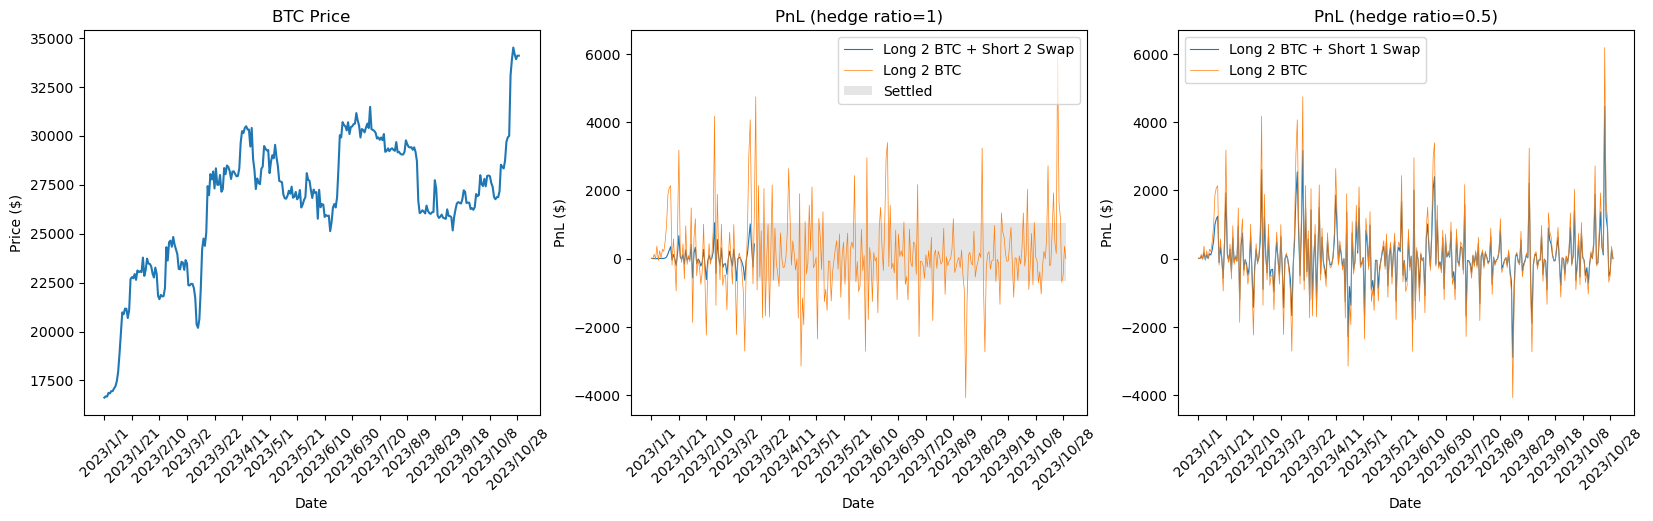

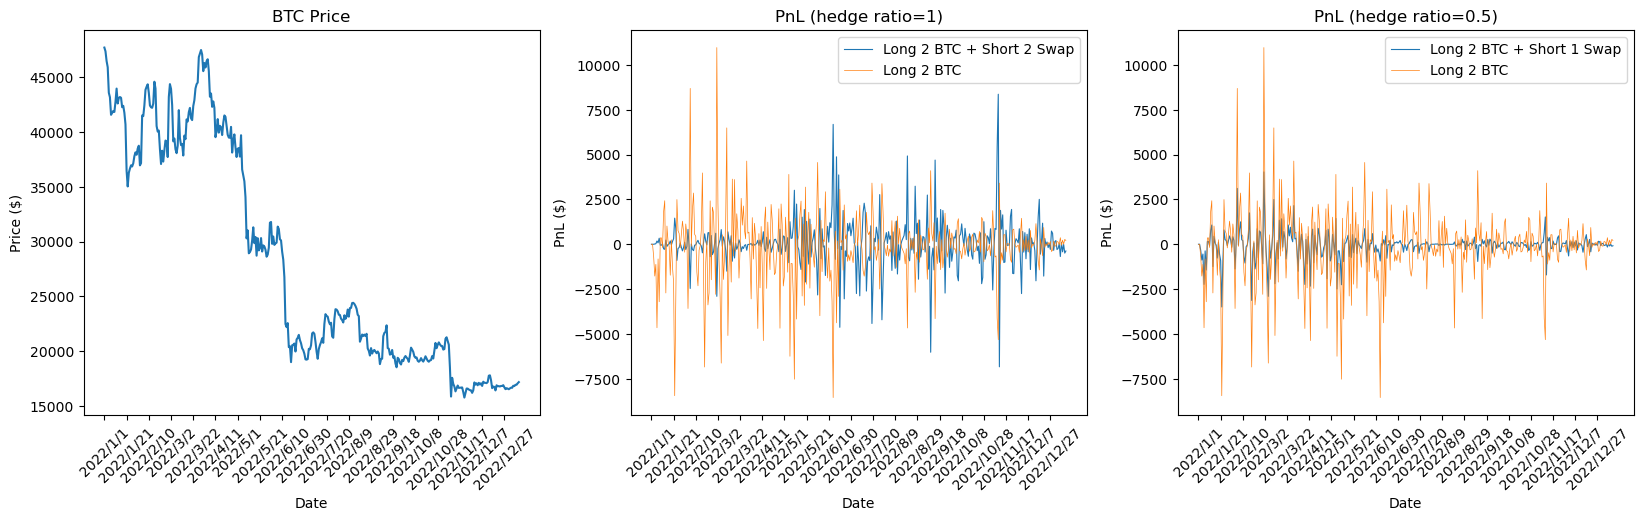

In [19]:
pnl_list=[i/10**18 for i in pnl_history1]
pnl_list_half=[i/10**18 for i in pnl_history2]
pnl_asset_list=[i/10**18 for i in pnl_asset]

pnl_list_2=[i/10**18 for i in pnl_history1_2]
pnl_list_half_2=[i/10**18 for i in pnl_history2_2]
pnl_asset_list_2=[i/10**18 for i in pnl_asset_2]

plot_hedge_pnl(btc,date_list,pnl_list,pnl_list_half,pnl_asset_list)
plot_hedge_pnl(btc2,date_list2,pnl_list_2,pnl_list_half_2,pnl_asset_list_2)

In [8]:
date_list=btc2['Date'].to_list()
btc_list=btc2['Adj Close'].to_list()
with open('btc_list.txt','w') as f:
    f.write('['+str(int(btc_list[0])))
    for i in btc_list:
        f.write(','+str(int(i)))
    f.write(']')

In [15]:
import numpy as np

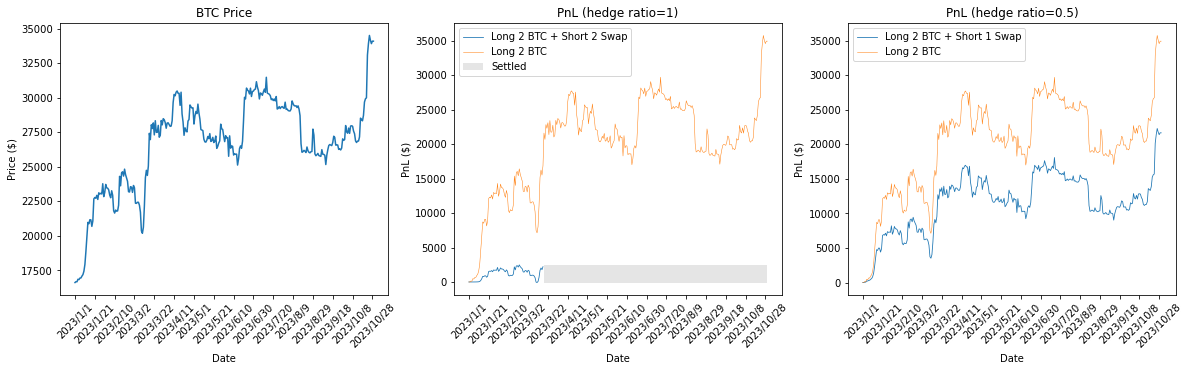

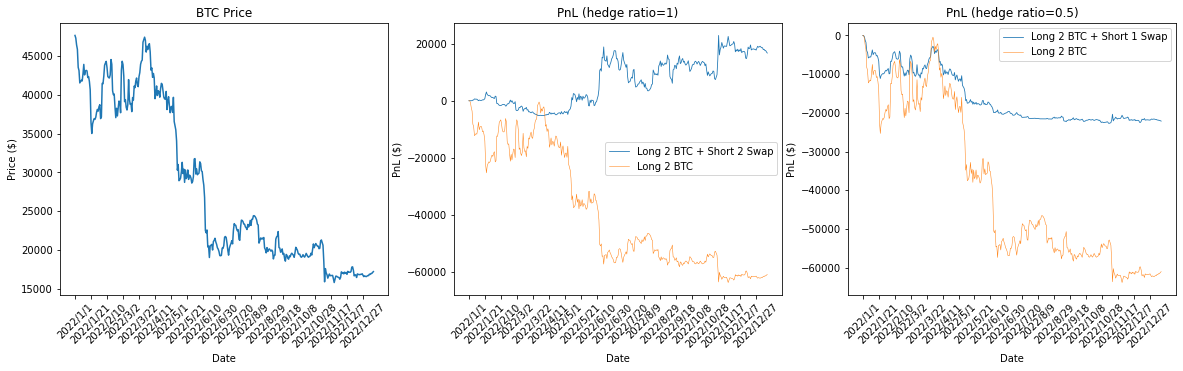

In [18]:
pnl_list=[i/10**18 for i in pnl_history1]
pnl_list_half=[i/10**18 for i in pnl_history2]
pnl_asset_list=[i/10**18 for i in pnl_asset]

pnl_list_2=[i/10**18 for i in pnl_history1_2]
pnl_list_half_2=[i/10**18 for i in pnl_history2_2]
pnl_asset_list_2=[i/10**18 for i in pnl_asset_2]

plot_hedge_pnl(btc,date_list,np.array(pnl_list).cumsum(),np.array(pnl_list_half).cumsum(),np.array(pnl_asset_list).cumsum())
plot_hedge_pnl(btc2,date_list2,np.array(pnl_list_2).cumsum(),np.array(pnl_list_half_2).cumsum(),np.array(pnl_asset_list_2).cumsum())

In [151]:
def cal_MDD(cumulative_returns):
    max_drawdown = 0.0  
    peak = 0 
    trough = 0  

    for i in range(1, len(cumulative_returns)):
        if cumulative_returns[i] > cumulative_returns[peak]:
            peak = i
        elif (cumulative_returns[peak] - cumulative_returns[i]) > max_drawdown:
            max_drawdown = cumulative_returns[peak] - cumulative_returns[i]
            trough = i
            
    return max_drawdown

In [152]:
def cal_MDD_list(pnl):
    mdd = [-cal_MDD(pnl[:i]) for i in range(1,len(pnl)+1) ]
    return mdd

In [153]:
def plot_mdd(pnl_list,pnl_asset_list,hedge_ratio,date_list):
    
    strat_mdd = cal_MDD_list(pnl_list)
    asset_mdd = cal_MDD_list(pnl_asset_list)
    
    plt.plot(strat_mdd,label='Long 2 BTC + Short 2 Swap',linewidth=1)
    plt.plot(asset_mdd,label='Long 2 BTC',linewidth=1)
      
    plt.xlabel('Date')
    plt.xticks(range(0,len(pnl_asset_list),20),date_list[0:len(pnl_asset_list):20],rotation=45)
    plt.ylabel('Max DrawDown ($)')
    plt.title('MDD (hedge ratio={})'.format(hedge_ratio))
    plt.legend()

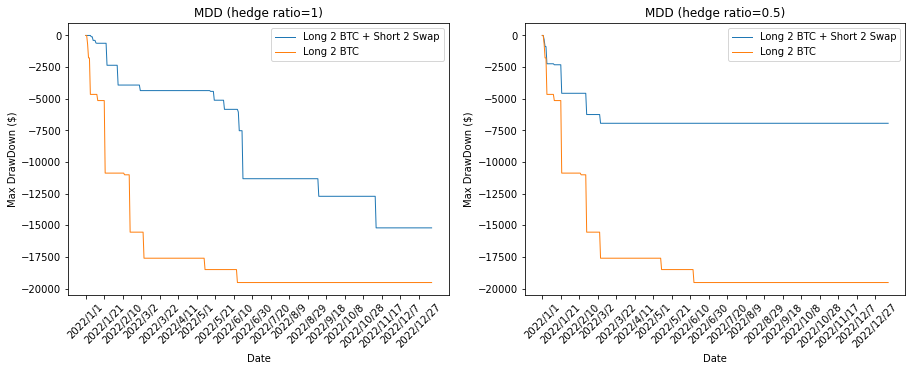

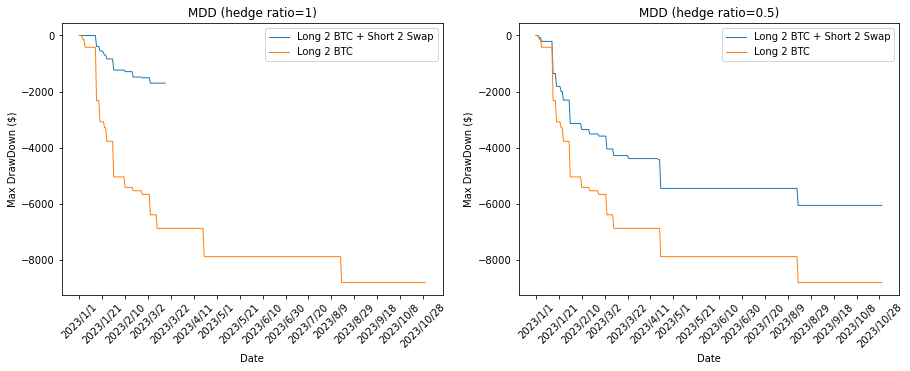

In [156]:
pnl_list=[i/10**18 for i in pnl_history1]
pnl_list_half=[i/10**18 for i in pnl_history2]
pnl_asset_list=[i/10**18 for i in pnl_asset]

pnl_list_2=[i/10**18 for i in pnl_history1_2]
pnl_list_half_2=[i/10**18 for i in pnl_history2_2]
pnl_asset_list_2=[i/10**18 for i in pnl_asset_2]


plt.figure(figsize=(15,5))
plt.subplot(121)
plot_mdd(pnl_list_2,pnl_asset_list_2,1,date_list2)
plt.subplot(122)
plot_mdd(pnl_list_half_2,pnl_asset_list_2,0.5,date_list2)


plt.figure(figsize=(15,5))
plt.subplot(121)
plot_mdd(pnl_list,pnl_asset_list,1,date_list)
plt.subplot(122)
plot_mdd(pnl_list_half,pnl_asset_list,0.5,date_list)


In [99]:
def cal_vol_list(pnl):
    pnl = np.array(pnl)/20000

    vol = [np.std(pnl[:i])* np.sqrt(252/i) for i in range(1,len(pnl)+1) ]
    return vol

In [102]:
def plot_vol(pnl_list,pnl_asset_list,hedge_ratio,date_list):
    
    strat_vol = cal_vol_list(pnl_list)
    asset_vol = cal_vol_list(pnl_asset_list)
    
    plt.plot(strat_vol,label='Long 2 BTC + Short 2 Swap',linewidth=1)
    plt.plot(asset_vol,label='Long 2 BTC',linewidth=1)
      
    plt.xlabel('Date')
    plt.xticks(range(0,len(pnl_asset_list),20),date_list[0:len(pnl_asset_list):20],rotation=45)
    plt.ylabel('Relative Vol (Scaled)')
    plt.title('Vol (hedge ratio={})'.format(hedge_ratio))
    plt.legend()

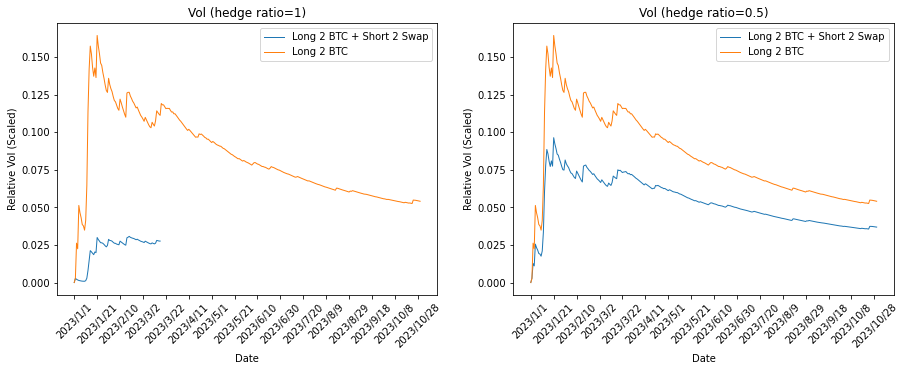

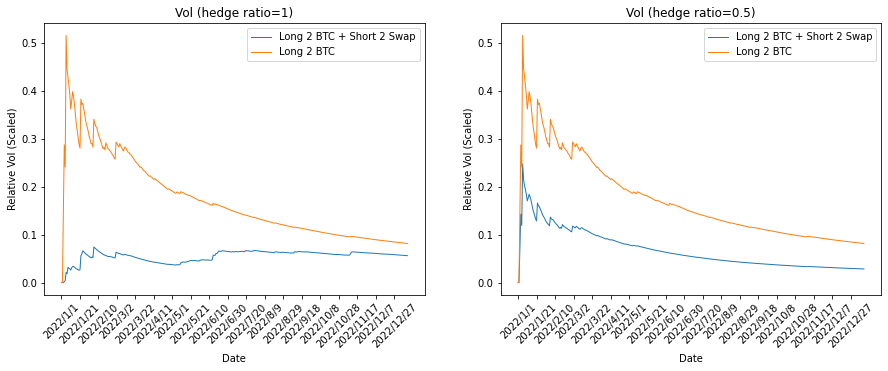

In [103]:
pnl_list=[i/10**18 for i in pnl_history1]
pnl_list_half=[i/10**18 for i in pnl_history2]
pnl_asset_list=[i/10**18 for i in pnl_asset]

pnl_list_2=[i/10**18 for i in pnl_history1_2]
pnl_list_half_2=[i/10**18 for i in pnl_history2_2]
pnl_asset_list_2=[i/10**18 for i in pnl_asset_2]

plt.figure(figsize=(15,5))
plt.subplot(121)
plot_vol(pnl_list,pnl_asset_list,1,date_list)
plt.subplot(122)
plot_vol(pnl_list_half,pnl_asset_list,0.5,date_list)

plt.figure(figsize=(15,5))
plt.subplot(121)
plot_vol(pnl_list_2,pnl_asset_list_2,1,date_list2)
plt.subplot(122)
plot_vol(pnl_list_half_2,pnl_asset_list_2,0.5,date_list2)

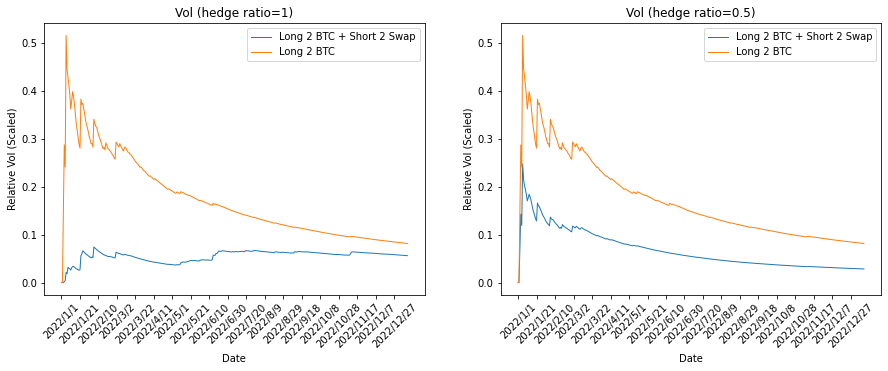

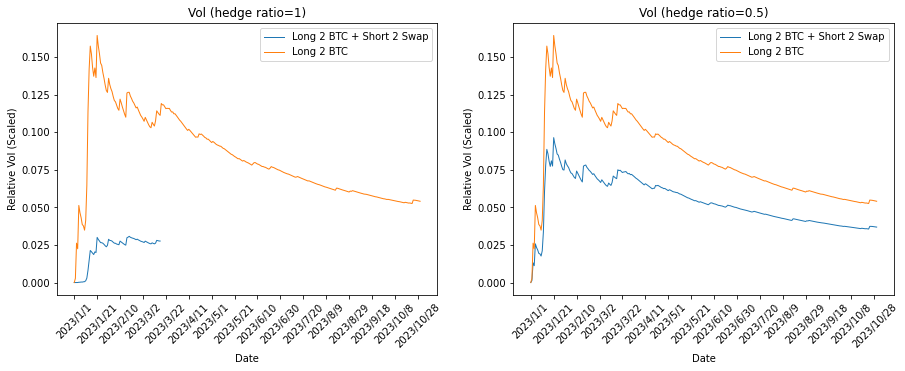

In [149]:
pnl_list=[i/10**18 for i in pnl_history1]
pnl_list_half=[i/10**18 for i in pnl_history2]
pnl_asset_list=[i/10**18 for i in pnl_asset]

pnl_list_2=[i/10**18 for i in pnl_history1_2]
pnl_list_half_2=[i/10**18 for i in pnl_history2_2]
pnl_asset_list_2=[i/10**18 for i in pnl_asset_2]

plt.figure(figsize=(15,5))
plt.subplot(121)
plot_vol(pnl_list_2,pnl_asset_list_2,1,date_list2)
plt.subplot(122)
plot_vol(pnl_list_half_2,pnl_asset_list_2,0.5,date_list2)

plt.figure(figsize=(15,5))
plt.subplot(121)
plot_vol(pnl_list,pnl_asset_list,1,date_list)
plt.subplot(122)
plot_vol(pnl_list_half,pnl_asset_list,0.5,date_list)

In [104]:
#scenario 1
pnl_asset=(10000000000000000000,0,126000000000000000000,-18000000000000000000,368000000000000000000,-54000000000000000000,230000000000000000000,8000000000000000000,272000000000000000000,210000000000000000000,500000000000000000000,976000000000000000000,1870000000000000000000,2080000000000000000000,2134000000000000000000,-192000000000000000000,578000000000000000000,-16000000000000000000,-946000000000000000000,796000000000000000000,3180000000000000000000,202000000000000000000,-114000000000000000000,428000000000000000000,-596000000000000000000,962000000000000000000,-170000000000000000000,92000000000000000000,-94000000000000000000,1486000000000000000000,-1868000000000000000000,598000000000000000000,1168000000000000000000,-504000000000000000000,-44000000000000000000,-236000000000000000000,-752000000000000000000,-390000000000000000000,1008000000000000000000,-650000000000000000000,-2240000000000000000000,-336000000000000000000,438000000000000000000,-164000000000000000000,40000000000000000000,824000000000000000000,4174000000000000000000,-1368000000000000000000,1884000000000000000000,152000000000000000000,-628000000000000000000,1004000000000000000000,-786000000000000000000,-496000000000000000000,-482000000000000000000,-1498000000000000000000,-46000000000000000000,772000000000000000000,-78000000000000000000,-750000000000000000000,998000000000000000000,-342000000000000000000,-2226000000000000000000,-18000000000000000000,164000000000000000000,-12000000000000000000,-420000000000000000000,-1002000000000000000000,-2710000000000000000000,-352000000000000000000,890000000000000000000,3062000000000000000000,4068000000000000000000,1098000000000000000000,-742000000000000000000,1354000000000000000000,4742000000000000000000,-916000000000000000000,2146000000000000000000,-542000000000000000000,816000000000000000000,-1736000000000000000000,2052000000000000000000,-1680000000000000000000,2000000000000000000,1000000000000000000000,-1710000000000000000000,258000000000000000000,2160000000000000000000,-630000000000000000000,890000000000000000000,-134000000000000000000,-424000000000000000000,-818000000000000000000,756000000000000000000,18000000000000000000,-266000000000000000000,-238000000000000000000,44000000000000000000,772000000000000000000,2638000000000000000000,1166000000000000000000,-192000000000000000000,520000000000000000000,172000000000000000000,-334000000000000000000,-6000000000000000000,-1740000000000000000000,1904000000000000000000,-3150000000000000000000,-1154000000000000000000,-1938000000000000000000,1082000000000000000000,-452000000000000000000,-132000000000000000000,1564000000000000000000,230000000000000000000,2102000000000000000000,-266000000000000000000,-184000000000000000000,40000000000000000000,-2354000000000000000000,1178000000000000000000,652000000000000000000,-318000000000000000000,1374000000000000000000,-1260000000000000000000,-900000000000000000000,-1520000000000000000000,-72000000000000000000,-74000000000000000000,-1242000000000000000000,-392000000000000000000,-40000000000000000000,292000000000000000000,524000000000000000000,-312000000000000000000,724000000000000000000,-1132000000000000000000,116000000000000000000,478000000000000000000,-752000000000000000000,196000000000000000000,748000000000000000000,-1782000000000000000000,284000000000000000000,486000000000000000000,298000000000000000000,2434000000000000000000,-680000000000000000000,-86000000000000000000,-966000000000000000000,-800000000000000000000,860000000000000000000,-348000000000000000000,88000000000000000000,-2718000000000000000000,2956000000000000000000,-1786000000000000000000,326000000000000000000,-56000000000000000000,-1258000000000000000000,178000000000000000000,-76000000000000000000,32000000000000000000,-1588000000000000000000,904000000000000000000,1502000000000000000000,366000000000000000000,-348000000000000000000,1030000000000000000000,2952000000000000000000,3400000000000000000000,-230000000000000000000,1566000000000000000000,-294000000000000000000,-136000000000000000000,-418000000000000000000,834000000000000000000,-1204000000000000000000,718000000000000000000,64000000000000000000,226000000000000000000,60000000000000000000,1072000000000000000000,-758000000000000000000,-526000000000000000000,-1210000000000000000000,866000000000000000000,-100000000000000000000,-242000000000000000000,486000000000000000000,412000000000000000000,-458000000000000000000,2170000000000000000000,-2284000000000000000000,-78000000000000000000,-92000000000000000000,-208000000000000000000,-578000000000000000000,114000000000000000000,-242000000000000000000,232000000000000000000,-274000000000000000000,626000000000000000000,-1816000000000000000000,102000000000000000000,254000000000000000000,-288000000000000000000,218000000000000000000,74000000000000000000,-162000000000000000000,-90000000000000000000,890000000000000000000,-1048000000000000000000,54000000000000000000,-208000000000000000000,-64000000000000000000,-2000000000000000000,278000000000000000000,1170000000000000000000,-408000000000000000000,-264000000000000000000,-64000000000000000000,36000000000000000000,-266000000000000000000,252000000000000000000,-476000000000000000000,-938000000000000000000,-4074000000000000000000,-1230000000000000000000,94000000000000000000,186000000000000000000,-130000000000000000000,-186000000000000000000,800000000000000000000,-538000000000000000000,-230000000000000000000,-78000000000000000000,162000000000000000000,34000000000000000000,3242000000000000000000,-860000000000000000000,-2732000000000000000000,-262000000000000000000,136000000000000000000,202000000000000000000,-314000000000000000000,-66000000000000000000,-52000000000000000000,974000000000000000000,-670000000000000000000,-20000000000000000000,-126000000000000000000,-1340000000000000000000,1342000000000000000000,790000000000000000000,622000000000000000000,138000000000000000000,-80000000000000000000,-68000000000000000000,440000000000000000000,914000000000000000000,-158000000000000000000,-1130000000000000000000,24000000000000000000,0,-646000000000000000000,84000000000000000000,-162000000000000000000,270000000000000000000,1338000000000000000000,-220000000000000000000,112000000000000000000,2032000000000000000000,-906000000000000000000,-202000000000000000000,740000000000000000000,-768000000000000000000,1062000000000000000000,44000000000000000000,-66000000000000000000,-704000000000000000000,-384000000000000000000,-1036000000000000000000,-234000000000000000000,212000000000000000000,-2000000000000000000,596000000000000000000,2720000000000000000000,-208000000000000000000,-174000000000000000000,782000000000000000000,1926000000000000000000,472000000000000000000,150000000000000000000,6186000000000000000000,1630000000000000000000,1202000000000000000000,-692000000000000000000,-494000000000000000000,360000000000000000000,-2000000000000000000)
#hedge_ratio=1
pnl_history1=(-12625,0,37894736842101440,-73346116970268901,1301756700041967152,-778153353495821616,2950819672131146815,156214972567997890,5374225892067224861,5787256450763572752,16748080949057916386,46209790209790206226,137012378721980600448,247915628809157873682,352540358631774568720,-39871853546910739680,117925287356321834433,-3438235155179752741,-203004867444827733664,156522041763341052958,673521767997723601664,53947433409772460800,-30816086402950337600,114911971830985900236,-164085811458969209260,255672026859869233857,-47778258424536061944,25612365404654388474,-26304359129907263455,413648821154096649810,-562112896441490707840,162852889667250437689,329063140152988480847,-150904691649454118845,-12843253376507195100,-68729753934069683999,-216307573614504297845,-107630145937704204160,271929701230228465888,-185634456671251719473,-617052181873664926109,-80061597690086636862,101777192739365390520,-39368998628257888364,9487791444832015776,196024944974321355980,1051953195319531963617,-432625005142551539983,558508741480760269905,49161001424791389306,-204423034779432654586,318075718337649525501,-259868460268234743724,-158648551317727941668,-150809326938977995385,-458339082139725231578,-13043710664712466975,218358576051779936379,-22978566274776127144,-220070572230252510187,281416425454702553642,-101619385942654150425,-650020447284345067932,-4621947947410781271,42062005099986593515,-3110318698462235360,-108777921440991572708,-252495521850668340994,-636135003223132893236,-64702450523007417673,157261108634269586120,595421868941450179348,1017412985606641700963,343825515559780130296,-243655217004768441250,430780307692307696616)
pnl_hedge1=(-10000000000000012625,0,-125962105263157898560,17926653883029731099,-366698243299958032848,53221846646504178384,-227049180327868853185,-7843785027432002110,-266625774107932775139,-204212743549236427248,-483251919050942083614,-929790209790209793774,-1732987621278019399552,-1832084371190842126318,-1781459641368225431280,152128146453089260320,-460074712643678165567,12561764844820247259,742995132555172266336,-639477958236658947042,-2506478232002276398336,-148052566590227539200,83183913597049662400,-313088028169014099764,431914188541030790740,-706327973140130766143,122221741575463938056,-66387634595345611526,67695640870092736545,-1072351178845903350190,1305887103558509292160,-435147110332749562311,-838936859847011519153,353095308350545881155,31156746623492804900,167270246065930316001,535692426385495702155,282369854062295795840,-736070298769771534112,464365543328748280527,1622947818126335073891,255938402309913363138,-336222807260634609480,124631001371742111636,-30512208555167984224,-627975055025678644020,-3122046804680468036383,935374994857448460017,-1325491258519239730095,-102838998575208610694,423576965220567345414,-685924281662350474499,526131539731765256276,337351448682272058332,331190673061022004615,1039660917860274768422,32956289335287533025,-553641423948220063621,55021433725223872856,529929427769747489813,-716583574545297446358,240380614057345849575,1575979552715654932068,13378052052589218729,-121937994900013406485,8889681301537764640,311222078559008427292,749504478149331659006,2073864996776867106764,287297549476992582327,-732738891365730413880,-2466578131058549820652,-3050587014393358299037,-754174484440219869704,498344782995231558750,-923219692307692303384)
#hedge_ratio=0.5
pnl_history2=(4999999999999985375,0,63018947368421050720,-9036673058485126111,184650878350020983576,-27389076676747910808,116475409836065564932,4078107486283998945,138687112946033620976,107893628225381786376,258374040474528949470,511104895104895112080,1003506189360990300224,1163957814404578936841,1243270179315887273872,-115935926773455369840,347962643678160927801,-9719117577589886951,-574502433722413866832,476261020881670537022,1926760883998861800832,127973716704886230400,-72408043201475180160,271455985915492950118,-380042905729484593312,608836013429934605370,-108889129212268019456,58806182702327182698,-60152179564953620212,949824410577048313018,-1215056448220745353920,380426444833625230414,748531570076494228562,-327452345824727047687,-28421626688253597550,-152364876967034853665,-484153786807252137445,-248815072968852102080,639964850615114221312,-417817228335625848267,-1428526090936832473964,-208030798845043318431,269888596369682695260,-101684499314128933288,24743895722416007888,510012472487160666880,2612976597659765993962,-900312502571275781803,1221254370740380147235,100580500712395694653,-416211517389716327293,661037859168824750336,-522934230134117359644,-327324275658863982928,-316404663469488985719,-978169541069862627388,-29521855332356221900,495179288025889956409,-50489283137388063572,-485035286115126243520,639708212727351264998,-221809692971327063475,-1438010223642172533966,-11310973973705401812,103031002549993307975,-7555159349231117680,-264388960720495786354,-627247760925334181356,-1673067501611566446618,-208351225261503698743,523630554317134782744,1828710934470725089674,2542706492803320862580,720912757779890065148,-492827608502384220625,892390153846153848308,3169030975570812694805,-638424242424242430670,1484651585388466548268,-381360154076610333117,571790686786473161725,-1223980124223602473364,1427540337642362765961,-1187260085412769566516,1395482486451100896,697752236851676713554,-1202387654497392295851,179000036847341462772,1501733900542760759544,-445320304783406237856,626171654835372579912,-94898237235760920934,-299983245925873783819,-576942515692045835870,529934508816120917152,12689718829877876804,-187550910316925148056,-167475823705605478775,30906356311548780637,542446917379325171455,1864281015070765516084,839227438284095515485,-139229369935505194833,376624307375825337268,124981348070660198835,-242953911759881888890,-4355432416386300195,-1263028203859475514030,1366651044319918489920,-2288845938743954992544,-821277080008326967640,-1367818374933616570224,752354157501099856729,-316970341877269298894,-92243557681852778025,1091816893732970023208,162479598685837423088,1487419041587502648490,-191000508940386105260,-131885480572597145472,28635120350109398236,-1685633866338663380995,829518991847922812960,463083682008368225944,-226895400951527269734,978189690435747198426,-905473014153179389320,-641246886244118445060,-1076083503198144384974,-50395320285982507584,-51766288234868777303,-868334310850439871000,-271351111111111121380,-27598865840919254560,201404121863799296090,362305235796509445920,-216651368049426304116,501465601420328476914,-788656690269362751760,80074239713774613140,330280401636296019265,-521651664270706620962,135118603521100432286,516504711183941017450,-1238072727272727285720,194380496696286185728,333459586040187319506,205317639133201096204,1681188476998660113885,-478796510592843139150,-60241845377545506158,-676220922677063027694,-555758844924501281109,593524739923188804764,-241872068699768824725,60990581717451523958,-1885130793908329930720,2002414596273291905342,-1241111975915999688890,223169861453786289752,-38444545043005883600,-863212235649546829576,120780550075432280120,-51653045489591358598,21733611304146398392,-1078844972605910961884,604993472377010033104,1013979199249296232922,250473734189235386030,-238913617502829139968,704996202916160396633,2038398271945178938679,2402577046633953482389,-166347287441302812304,1130941829366140676505,-214405929304446975452,-99003797302605744640,-304037401574803157005,605050180040302602656,-877968978102189782480,519682510137605523545,46531121694859591723,164377793089871055970,43700555737168990620,781068582625734816644,-555824496084221315378,-383976410956233564698,-880475847152126892403,625388144036911981916,-72612220684200119136,-175612174831638743066,352140996320970484110,299429473268889311600,-333702808621815803297,1576643414168668359304,-1680999618757148308800,-56631898200039544675,-66764152500412604492,-150858276306654770105,-418664123403549523040,82269694533762062493,-174771036004412794720,167287325456498394776,-197868530159154736162,451264183265594035196,-1314372556840845642808,72948039484507821131,181781161255003914962,-206468351843019663710,155980828483396094411,53025887649646974116,-116141572421310803600,-64452604611443218510,636975709887102315000,-754524684077506345210,38606359987650519414,-148760847213654105698,-45707367407305514624,-1427725363266997055,198451086395096591200,836802604523646344960,-294091718461280021760,-189786001826731181598,-45928030174317831532,25823451372589032630,-190852626211116798194,180484393142544925888,-341493743199129503250,-670780939321220432573,-2894426465976795218880,-846662916291629156943,64012668432569367472,126770232985898233101,-88749856810111108336,-126833716123105195737,544612193154316014657,-368850894782641593070,-156943658741686435961,-53114984451184378136,110238234389418632456,23170148338380157876,2210014249597793619219,-602251235258051730029,-1900299813166282001135,-178037946858971903800,92195348837209313976,137108241843203969587,-213520967307173957876,-44751743375174332056,-35237518910741296292,659708849454432488960,-457816310975609740120,-13584250144759701865,-85565167020660369032,-908930009290802113928,898791193068913440568,535871559633027525956,424927405825834998265,94788876747428318880,-55015033072760086328,-46730803974706424526,302199442225069743248,630104507737160798299,-109748190070192199180,-783903140203449803229,16492942372115764327,0,-444026261334135963808,57414076782449726334,-110809034907597525420,184418125643666325312,916066939890710373120,-152341512157211058793,77414886106053282487,1405830236956279904272,-636948790336990319030,-141025790047221214678,515806628021437160197,-538420518723695094515,740087908079518517500,30916195519931287936,-46389731121281454375,-494576695901199226307,-268311351194576354958,-721693841042678257789,-161639638298664093428,146156077141575730496,-1381282108554838986,411615204199396892015,1887745498729702876007,-147391984291174309695,-123113496392750319832,552600818977689917324,1368701347539956138892,339855265817667263408,108336118724513682049,4472078084886473495016,1220603276310221870702,907359133948851048276,-525327923018955421888,-373812038880430963115,271775634787224644205,-1512452697351052256)
pnl_hedge2=(-5000000000000014625,0,-62981052631578949280,8963326941514873889,-183349121649979016424,26610923323252089192,-113524590163934435068,-3921892513716001055,-133312887053966379024,-102106371774618213624,-241625959525471050530,-464895104895104887920,-866493810639009699776,-916042185595421063159,-890729820684112726128,76064073226544630160,-230037356321839072199,6280882422410113049,371497566277586133168,-319738979118329462978,-1253239116001138199168,-74026283295113769600,41591956798524819840,-156544014084507049882,215957094270515406688,-353163986570065394630,61110870787731980544,-33193817297672817302,33847820435046379788,-536175589422951686982,652943551779254646080,-217573555166374769586,-419468429923505771438,176547654175272952313,15578373311746402450,83635123032965146335,267846213192747862555,141184927031147897920,-368035149384885778688,232182771664374151733,811473909063167526036,127969201154956681569,-168111403630317304740,62315500685871066712,-15256104277583992112,-313987527512839333120,-1561023402340234006038,467687497428724218197,-662745629259619852765,-51419499287604305347,211788482610283672707,-342962140831175249664,263065769865882640356,168675724341136017072,165595336530511014281,519830458930137372612,16478144667643778100,-276820711974110043591,27510716862611936428,264964713884873756480,-358291787272648735002,120190307028672936525,787989776357827466034,6689026026294598188,-60968997450006692025,4444840650768882320,155611039279504213646,374752239074665818644,1036932498388433553382,143648774738496301257,-366369445682865217256,-1233289065529274910326,-1525293507196679137420,-377087242220109934852,249172391497615779375,-461609846153846151692,-1572969024429187305195,277575757575757569330,-661348414611533451732,160639845923389666883,-244209313213526838275,512019875776397526636,-624459662357637234039,492739914587230433484,-604517513548899104,-302247763148323286446,507612345502607704149,-78999963152658537228,-658266099457239240456,184679695216593762144,-263828345164627420088,39101762764239079066,124016754074126216181,241057484307954164130,-226065491183879082848,-5310281170122123196,78449089683074851944,70524176294394521225,-13093643688451219363,-229553082620674828545,-773718984929234483916,-326772561715904484515,52770630064494805167,-143375692624174662732,-47018651929339801165,91046088240118111110,1644567583613699805,476971796140524485970,-537348955680081510080,861154061256045007456,332722919991673032360,570181625066383429776,-329645842498900143271,135029658122730701106,39756442318147221975,-472183106267029976792,-67520401314162576912,-614580958412497351510,74999491059613894740,52114519427402854528,-11364879649890601764,668366133661336619005,-348481008152077187040,-188916317991631774056,91104599048472730266,-395810309564252801574,354526985846820610680,258753113755881554940,443916496801855615026,21604679714017492416,22233711765131222697,373665689149560129000,120648888888888878620,12401134159080745440,-90595878136200703910,-161694764203490554080,95348631950573695884,-222534398579671523086,343343309730637248240,-35925760286225386860,-147719598363703980735,230348335729293379038,-60881396478899567714,-231495288816058982550,543927272727272714280,-89619503303713814272,-152540413959812680494,-92682360866798903796,-752811523001339886115,201203489407156860850,25758154622454493842,289779077322936972306,244241155075498718891,-266475260076811195236,106127931300231175275,-27009418282548476042,832869206091670069280,-953585403726708094658,544888024084000311110,-102830138546213710248,17555454956994116400,394787764350453170424,-57219449924567719880,24346954510408641402,-10266388695853601608,509155027394089038116,-299006527622989966896,-488020800750703767078,-115526265810764613970,109086382497170860032,-325003797083839603367,-913601728054821061321,-997422953366046517611,63652712558697187696,-435058170633859323495,79594070695553024548,36996202697394255360,113962598425196842995,-228949819959697397344,326031021897810217520,-198317489862394476455,-17468878305140408277,-61622206910128944030,-16299444262831009380,-290931417374265183356,202175503915778684622,142023589043766435302,329524152847873107597,-240611855963088018084,27387779315799880864,66387825168361256934,-133859003679029515890,-112570526731110688400,124297191378184196703,-593356585831331640696,603000381242851691200,21368101799960455325,25235847499587395508,57141723693345229895,159335876596450476960,-31730305466237937507,67228963995587205280,-64712674543501605224,76131469840845263838,-174735816734405964804,501627443159154357192,-29051960515492178869,-72218838744996085038,81531648156980336290,-62019171516603905589,-20974112350353025884,45858427578689196400,25547395388556781490,-253024290112897685000,293475315922493654790,-15393640012349480586,59239152786345894302,18292632592694485376,572274636733002945,-79548913604903408800,-333197395476353655040,113908281538719978240,74213998173268818402,18071969825682168468,-10176548627410967370,75147373788883201806,-71515606857455074112,134506256800870496750,267219060678779567427,1179573534023204781120,383337083708370843057,-29987331567430632528,-59229767014101766899,41250143189888891664,59166283876894804263,-255387806845683985343,169149105217358406930,73056341258313564039,24885015548815621864,-51761765610581367544,-10829851661619842124,-1031985750402206380781,257748764741948269971,831700186833717998865,83962053141028096200,-43804651162790686024,-64891758156796030413,100479032692826042124,21248256624825667944,16762481089258703708,-314291150545567511040,212183689024390259880,6415749855240298135,40434832979339630968,431069990709197886072,-443208806931086559432,-254128440366972474044,-197072594174165001735,-43211123252571681120,24984966927239913672,21269196025293575474,-137800557774930256752,-283895492262839201701,48251809929807800820,346096859796550196771,-7507057627884235673,0,201973738665864036192,-26585923217550273666,51190965092402474580,-85581874356333674688,-421933060109289626880,67658487842788941207,-34585113893946717513,-626169763043720095728,269051209663009680970,60974209952778785322,-224193371978562839803,229579481276304905485,-321912091920481482500,-13083804480068712064,19610268878718545625,209423304098800773693,115688648805423645042,314306158957321742211,72360361701335906572,-65843922858424269504,618717891445161014,-184384795800603107985,-832254501270297123993,60608015708825690305,50886503607249680168,-229399181022310082676,-557298652460043861108,-132144734182332736592,-41663881275486317951,-1713921915113526504984,-409396723689778129298,-294640866051148951724,166672076981044578112,120187961119569036885,-88224365212775355795,487547302648947744)


#scenario 2
pnl_asset_2=(0,0,-682000000000000000000,-1774000000000000000000,-1122000000000000000000,-4656000000000000000000,-818000000000000000000,-3206000000000000000000,352000000000000000000,356000000000000000000,-180000000000000000000,1828000000000000000000,2428000000000000000000,-2716000000000000000000,1016000000000000000000,156000000000000000000,-128000000000000000000,-1726000000000000000000,250000000000000000000,-1262000000000000000000,-2128000000000000000000,-8446000000000000000000,-2854000000000000000000,2492000000000000000000,756000000000000000000,600000000000000000000,-204000000000000000000,572000000000000000000,1292000000000000000000,708000000000000000000,-442000000000000000000,1132000000000000000000,520000000000000000000,-3582000000000000000000,404000000000000000000,8692000000000000000000,-118000000000000000000,1942000000000000000000,2856000000000000000000,556000000000000000000,440000000000000000000,-1546000000000000000000,-2316000000000000000000,-326000000000000000000,-94000000000000000000,778000000000000000000,3978000000000000000000,-1228000000000000000000,-6846000000000000000000,-1016000000000000000000,184000000000000000000,-3382000000000000000000,-2712000000000000000000,2422000000000000000000,-1980000000000000000000,2072000000000000000000,1764000000000000000000,-218000000000000000000,-2792000000000000000000,10968000000000000000000,2322000000000000000000,-860000000000000000000,-2946000000000000000000,-6628000000000000000000,526000000000000000000,-1962000000000000000000,-714000000000000000000,1350000000000000000000,6490000000000000000000,-5090000000000000000000,-1286000000000000000000,220000000000000000000,-2110000000000000000000,3634000000000000000000,-656000000000000000000,3610000000000000000000,-384000000000000000000,1700000000000000000000,778000000000000000000,-1886000000000000000000,-340000000000000000000,2562000000000000000000,1068000000000000000000,2136000000000000000000,776000000000000000000,304000000000000000000,4640000000000000000000,616000000000000000000,674000000000000000000,-806000000000000000000,-3048000000000000000000,1486000000000000000000,-826000000000000000000,1170000000000000000000,338000000000000000000,-2134000000000000000000,-4698000000000000000000,594000000000000000000,-2432000000000000000000,990000000000000000000,-1150000000000000000000,-5372000000000000000000,1212000000000000000000,2078000000000000000000,-2462000000000000000000,1236000000000000000000,-258000000000000000000,-1416000000000000000000,2220000000000000000000,1352000000000000000000,-256000000000000000000,-1694000000000000000000,-1574000000000000000000,-508000000000000000000,-34000000000000000000,1978000000000000000000,-4682000000000000000000,2248000000000000000000,1064000000000000000000,-2328000000000000000000,-1790000000000000000000,1510000000000000000000,120000000000000000000,-1558000000000000000000,3896000000000000000000,-6246000000000000000000,-1070000000000000000000,-1078000000000000000000,-2884000000000000000000,-7526000000000000000000,1452000000000000000000,-4172000000000000000000,222000000000000000000,472000000000000000000,1636000000000000000000,2408000000000000000000,-2886000000000000000000,1126000000000000000000,-3410000000000000000000,3188000000000000000000,-2228000000000000000000,464000000000000000000,1782000000000000000000,-2450000000000000000000,1114000000000000000000,-186000000000000000000,-590000000000000000000,-1280000000000000000000,374000000000000000000,1262000000000000000000,4562000000000000000000,132000000000000000000,-3986000000000000000000,1336000000000000000000,-1526000000000000000000,256000000000000000000,148000000000000000000,2928000000000000000000,-430000000000000000000,-1882000000000000000000,-206000000000000000000,-2056000000000000000000,-1446000000000000000000,-3196000000000000000000,-8550000000000000000000,-562000000000000000000,732000000000000000000,-4382000000000000000000,180000000000000000000,-2908000000000000000000,3072000000000000000000,92000000000000000000,222000000000000000000,-1446000000000000000000,2196000000000000000000,292000000000000000000,542000000000000000000,-950000000000000000000,-584000000000000000000,-910000000000000000000,-352000000000000000000,-640000000000000000000,-1030000000000000000000,-54000000000000000000,110000000000000000000,1868000000000000000000,-82000000000000000000,716000000000000000000,2178000000000000000000,188000000000000000000,-278000000000000000000,-1464000000000000000000,-1780000000000000000000,-1294000000000000000000,1778000000000000000000,714000000000000000000,534000000000000000000,708000000000000000000,-822000000000000000000,3412000000000000000000,1808000000000000000000,-316000000000000000000,-134000000000000000000,-900000000000000000000,-498000000000000000000,288000000000000000000,-2496000000000000000000,-244000000000000000000,3382000000000000000000,1826000000000000000000,-78000000000000000000,-296000000000000000000,-640000000000000000000,-44000000000000000000,-672000000000000000000,-264000000000000000000,-432000000000000000000,1318000000000000000000,-656000000000000000000,428000000000000000000,1268000000000000000000,-1290000000000000000000,1566000000000000000000,20000000000000000000,890000000000000000000,44000000000000000000,-210000000000000000000,-366000000000000000000,-506000000000000000000,-1096000000000000000000,-246000000000000000000,-4670000000000000000000,578000000000000000000,736000000000000000000,-272000000000000000000,260000000000000000000,-266000000000000000000,410000000000000000000,-2680000000000000000000,-438000000000000000000,-850000000000000000000,1362000000000000000000,-1002000000000000000000,506000000000000000000,156000000000000000000,-316000000000000000000,-274000000000000000000,308000000000000000000,-348000000000000000000,-1950000000000000000000,906000000000000000000,78000000000000000000,4104000000000000000000,598000000000000000000,178000000000000000000,1202000000000000000000,-4148000000000000000000,-110000000000000000000,-1080000000000000000000,142000000000000000000,710000000000000000000,-1416000000000000000000,250000000000000000000,-1308000000000000000000,-686000000000000000000,1732000000000000000000,-232000000000000000000,-720000000000000000000,-270000000000000000000,840000000000000000000,-224000000000000000000,632000000000000000000,294000000000000000000,-284000000000000000000,-238000000000000000000,-536000000000000000000,1158000000000000000000,1426000000000000000000,-352000000000000000000,-410000000000000000000,-818000000000000000000,-260000000000000000000,60000000000000000000,-610000000000000000000,-180000000000000000000,212000000000000000000,450000000000000000000,-394000000000000000000,-236000000000000000000,402000000000000000000,564000000000000000000,-432000000000000000000,-390000000000000000000,-172000000000000000000,238000000000000000000,72000000000000000000,718000000000000000000,-444000000000000000000,1500000000000000000000,1350000000000000000000,-970000000000000000000,620000000000000000000,446000000000000000000,-366000000000000000000,-280000000000000000000,-20000000000000000000,-652000000000000000000,100000000000000000000,1876000000000000000000,270000000000000000000,-712000000000000000000,-648000000000000000000,-4122000000000000000000,-5322000000000000000000,3412000000000000000000,-1104000000000000000000,-470000000000000000000,-892000000000000000000,530000000000000000000,532000000000000000000,-430000000000000000000,36000000000000000000,20000000000000000000,28000000000000000000,-840000000000000000000,-1008000000000000000000,804000000000000000000,842000000000000000000,-12000000000000000000,-166000000000000000000,-114000000000000000000,-40000000000000000000,-454000000000000000000,454000000000000000000,1448000000000000000000,-402000000000000000000,242000000000000000000,-360000000000000000000,444000000000000000000,-312000000000000000000,230000000000000000000,-482000000000000000000,770000000000000000000,-200000000000000000000,-10000000000000000000,-48000000000000000000,204000000000000000000,1150000000000000000000,68000000000000000000,-902000000000000000000,-1434000000000000000000,296000000000000000000,-76000000000000000000,-636000000000000000000,934000000000000000000,-178000000000000000000,26000000000000000000,-68000000000000000000,102000000000000000000,-12000000000000000000,156000000000000000000,-404000000000000000000,-330000000000000000000,180000000000000000000,-80000000000000000000,-110000000000000000000,156000000000000000000,126000000000000000000,-18000000000000000000,368000000000000000000,-54000000000000000000,230000000000000000000,8000000000000000000,272000000000000000000,210000000000000000000)
#hedge_ratio=1
pnl_history1_2=(0,0,-9040,12777146477980749818,29657238796332182586,181484280018301868700,77295921412013097600,336199165894346645620,-51914430781817756561,-50781587712361906342,24802557801054614648,-256359723583845430415,-281292336492336499989,230942501535871097984,-121540231504308426984,-16602983827931034721,13367116751974437562,183076983740403129250,-32165680473372787250,158170666666666672384,302907627443464932560,1454588888888888881429,879051101297418879430,-900335483870967748564,-237786966589480621626,-180586020625306941882,59244682578340627152,-168160425485726678090,-366956109645107418592,-185544569129790390768,110656458125753822522,-291650394282248058519,-124355169815243093206,826828743256846390512,-117355921195063854042,-2463910857511977183500,17589108433734916567,-292651963031780083204,-355148165613505644800,-48776824817518221236,-35584568656784081656,116739771753349279950,219080362676460456528,40581837904119574784,12109364643499676926,-101202502547574476126,-476395998685013837625,85705171060011203839,580090307317849903514,179149637377275655880,-35191206595053706730,637591545785354675536,653107127058884736725,-693185219150370857126,486130700517160324032,-577222222222222221904,-430461650840029215540,47097873208547970415,612662114819076822375,-2901899705640563239354,-241537888083717298406,64605672543626295596,252318823422274846422,817356010459117554608,-114898280399621829000,412617563451776634186,172223066711783230794,-341348326414796895787,-1499316157678705118324,691566861988471235886,268991404011461324118,-50426354590916107544,476301151552539591751,-944480910988401271052,132635506479100473388,-766085718643550773526,61067787959069599758,-279590241996532453925,-109531590153345605480,245685138658449888424,53076829830048216477,-412207756165250609544,-134338354029935338260,-238738785787559436560,-65772884440400359820,-22881573013439150000,-332203146067415765260,-11393763348996132496,-7980224070616186980,3752786263562619370,40413752071735146004,-70093723922877585500,25075733022190530256,-46373506584110934323,-8971519600456358858,48701814593968522190,219765953243332202304,-61591445632551012438,233847228926740667305,-126398420318301132126,131821794212519304833,697353235245338447114,-250398016244528240795,-391447205123732125120,389939270271583329635,-239895730562163530701,45380465070401693952,254378389075796560552,-445498036055997580848,-227176799098613619670,38145246012240363584,258435925943829467362,278043427838231290680,101574433819828885172,7060730385453069877,-411797258608021468910,836459933758465576193,-564344308313875708150,-228981932162788923528,463165061725291041153,420830117330156194052,-399260751975393760913,-28751462216330054982,370282280879337664500,-1025447841059602661400,1256815154415839577550,325051811346548191120,348345948945615984103,989874651418269914465,3011151296279984748512,-833452601003432813852,2241061440268196776416,-143851949129112528863,-302874926842703199800,-1028149711436669766499,-1406753264011162418890,1510160229995208440430,-672085727680664374150,1934593590797041891920,-2105278830083565464248,1276796727584614376400,-293750136986301374240,-1105212965479749915669,1402874055997097908938,-711630765001030996370,113092766818411722936,361719775387321573640,805559845559845541570,-248998008872742502288,-826558756160199893440,-2826131499405671604848,-66403580659396072336,1992749245093105176619,-801940736266317659202,862447697508779995752,-154975491516294112232,-88575757575757570752,-1740782451681936740520,223649346509403887195,998598683999358052064,119124644204673342646,1200033210454651113672,924936835952274519560,2177922990126939352916,6684859128615200654571,629778894472361814320,-839924344771683320220,4875489455963140163315,-241151072076934400388,3866016315763763380124,-4631180943366461588256,-121453607745827862343,-291922617602796255480,1883500531144374701356,-3043328363436233554805,-368389471188048380555,-675361970703216987350,1156859826992837887861,740422123935891946680,1182802507836990589640,475685996055226818608,878058097890966968872,1452641528507885172743,79636618402615598112,-162604718844194993506,-2748129346530548792441,111280213533685933220,-975093412580485396736,-2876511777301927187170,-226335074178490560273,332036721733928486480,1769248610596517244620,2289083413231064233300,1795919078617926881051,-2609812865497076021100,-970534138135760937116,-703995235548641156244,-912353618736801683410,1027829731005191120438,-4418243611338370470155,-2026391283077607274948,328267647184573942114,141060221256080237268,952762907960628558378,547506207625253138285,-323331760516358777775,2768463532221681645929,300702214315809166925,-4211297801214746442830,-1971411077191452240195,77999999999999978328,296969921021677042000,650118363205951976176,45911895783339042320,702495667839066662990,283876403516406989928,469704981178324445700,-1459293327441449409089,687209927433552311913,-460881494708418606100,-1341098079827400234747,1293684321055063224732,-1657807459851493711350,-19826283041717107558,-881529824268481028626,-41984099663961973272,200009007533573531422,351672437189029150248,493714782896917466848,1092328769417577352410,256710777801585600744,4923900568671376887958,-742233175264645318144,-922173296796749490278,330330825671031858154,-319416767922235727224,323208286882199920540,-503823790605281605600,3236596296296296283680,592921421520236937047,1172508856843470877376,-1948987561174551392571,1352110065526925169744,-712888462315619319388,-215041747718090673249,432684652456898698070,380312384195503020744,-432585316659943533448,482317622335634952792,2743503937007874016665,-1387545469023729892530,-114820528771384145082,-6020856122924103680535,-735718160984051242720,-213517896678966795342,-1431036519821764900390,4694267679928475640832,148447970043358287751,1464384170742552251289,-201709050302015117796,-1002374064333400771540,1938865404680280223365,-363909058138936104440,1883428980761358988420,1045741450502911589279,-2721127298215344790685,337883686189666714347,1059236150696999530855,409897555050958450458,-1290424422933730453642,331699927166788039090,-945056619570905269830,-427696901060434477041,407913554386144184926,346080489938757640480,787513670256835142500,-1741621298046628859355,-2039333333333333345456,473406766325727770240,559804563492063492375,1136755600100225514602,374316995804768233696,-87360939431396786592,885858274195207242786,268434251084060396030,-318650989449372741546,-670149292686746343912,575367660716128356335,350598696898618720434,-603390045628572926468,-831832675939381357600,621726445012787722904,571908554877418019409,256548618005120438417,-357668293707027777360,-107083663676194450432,-1064514993752603070917,638055706035672305115,-2197544585164125099080,-1853587957203284395030,1257030332209918139425,-837496672418042879650,-586675697984947805460,472364684407724087420,367059849769808576105,26534276652842151745,865757969245789601056,-136549432015476951497,-2550687911326636655882,-338843807632288264560,883359082792970591580,828657172894963195626,5418903407436171246632,8365767218596623697880,-6833883627204030223532,1889593995223473224220,845746154749324874944,1640050241085778921271,-1015501131290894647268,-994594776748104460040,784462212745794825954,-66987341772151900151,-37153472763228860943,-51966940168892599916,1556998384297767924520,1942554784850530967051,-1624551593082916310963,-1638178639817159803170,22451053582179409700,310745121657431942108,215048120573815150704,75855199222546153856,862555825833130619065,-880984522414749947580,-2751059109705667723568,714599021435228329654,-438144515824836441088,644620786516853930316,-808222853087295950340,556536602451838883448,-416151761517615190124,862996898589736087696,-1409381528964862288668,353426565310741023859,17832837214731798800,85636618402615598112,-364752572497661371540,-2037196326862722304169,-114365896181317134510,1512413247263541965692,2504131997235659979075,-551903886586171680025,139786603155701108700,1173888166139523767804,-1775332927793661405096,324076659174257652327,-47725159065231608110,124670707070707073676,-187591093117408903491,21966403513978743665,-285720562911941092507,734669188486317157806,611339953340910453704,-338576607056549056250,149232063453911790274,205953499578364039269,-293568864446727501875,-235409684210526310352,33435043144774692247,-684128305054259859349,98703789361323611376,-421448087431693981781,-14505338918057936325,-493001002654084339963,-375925925925925921836)
pnl_hedge1_2=(0,0,681999999999999990960,1786777146477980749818,1151657238796332182586,4837484280018301868700,895295921412013097600,3542199165894346645620,-403914430781817756561,-406781587712361906342,204802557801054614648,-2084359723583845430415,-2709292336492336499989,2946942501535871097984,-1137540231504308426984,-172602983827931034721,141367116751974437562,1909076983740403129250,-282165680473372787250,1420170666666666672384,2430907627443464932560,9900588888888888881429,3733051101297418879430,-3392335483870967748564,-993786966589480621626,-780586020625306941882,263244682578340627152,-740160425485726678090,-1658956109645107418592,-893544569129790390768,552656458125753822522,-1423650394282248058519,-644355169815243093206,4408828743256846390512,-521355921195063854042,-11155910857511977183500,135589108433734916567,-2234651963031780083204,-3211148165613505644800,-604776824817518221236,-475584568656784081656,1662739771753349279950,2535080362676460456528,366581837904119574784,106109364643499676926,-879202502547574476126,-4454395998685013837625,1313705171060011203839,7426090307317849903514,1195149637377275655880,-219191206595053706730,4019591545785354675536,3365107127058884736725,-3115185219150370857126,2466130700517160324032,-2649222222222222221904,-2194461650840029215540,265097873208547970415,3404662114819076822375,-13869899705640563239354,-2563537888083717298406,924605672543626295596,3198318823422274846422,7445356010459117554608,-640898280399621829000,2374617563451776634186,886223066711783230794,-1691348326414796895787,-7989316157678705118324,5781566861988471235886,1554991404011461324118,-270426354590916107544,2586301151552539591751,-4578480910988401271052,788635506479100473388,-4376085718643550773526,445067787959069599758,-1979590241996532453925,-887531590153345605480,2131685138658449888424,393076829830048216477,-2974207756165250609544,-1202338354029935338260,-2374738785787559436560,-841772884440400359820,-326881573013439150000,-4972203146067415765260,-627393763348996132496,-681980224070616186980,809752786263562619370,3088413752071735146004,-1556093723922877585500,851075733022190530256,-1216373506584110934323,-346971519600456358858,2182701814593968522190,4917765953243332202304,-655591445632551012438,2665847228926740667305,-1116398420318301132126,1281821794212519304833,6069353235245338447114,-1462398016244528240795,-2469447205123732125120,2851939270271583329635,-1475895730562163530701,303380465070401693952,1670378389075796560552,-2665498036055997580848,-1579176799098613619670,294145246012240363584,1952435925943829467362,1852043427838231290680,609574433819828885172,41060730385453069877,-2389797258608021468910,5518459933758465576193,-2812344308313875708150,-1292981932162788923528,2791165061725291041153,2210830117330156194052,-1909260751975393760913,-148751462216330054982,1928282280879337664500,-4921447841059602661400,7502815154415839577550,1395051811346548191120,1426345948945615984103,3873874651418269914465,10537151296279984748512,-2285452601003432813852,6413061440268196776416,-365851949129112528863,-774874926842703199800,-2664149711436669766499,-3814753264011162418890,4396160229995208440430,-1798085727680664374150,5344593590797041891920,-5293278830083565464248,3504796727584614376400,-757750136986301374240,-2887212965479749915669,3852874055997097908938,-1825630765001030996370,299092766818411722936,951719775387321573640,2085559845559845541570,-622998008872742502288,-2088558756160199893440,-7388131499405671604848,-198403580659396072336,5978749245093105176619,-2137940736266317659202,2388447697508779995752,-410975491516294112232,-236575757575757570752,-4668782451681936740520,653649346509403887195,2880598683999358052064,325124644204673342646,3256033210454651113672,2370936835952274519560,5373922990126939352916,15234859128615200654571,1191778894472361814320,-1571924344771683320220,9257489455963140163315,-421151072076934400388,6774016315763763380124,-7703180943366461588256,-213453607745827862343,-513922617602796255480,3329500531144374701356,-5239328363436233554805,-660389471188048380555,-1217361970703216987350,2106859826992837887861,1324422123935891946680,2092802507836990589640,827685996055226818608,1518058097890966968872,2482641528507885172743,133636618402615598112,-272604718844194993506,-4616129346530548792441,193280213533685933220,-1691093412580485396736,-5054511777301927187170,-414335074178490560273,610036721733928486480,3233248610596517244620,4069083413231064233300,3089919078617926881051,-4387812865497076021100,-1684534138135760937116,-1237995235548641156244,-1620353618736801683410,1849829731005191120438,-7830243611338370470155,-3834391283077607274948,644267647184573942114,275060221256080237268,1852762907960628558378,1045506207625253138285,-611331760516358777775,5264463532221681645929,544702214315809166925,-7593297801214746442830,-3797411077191452240195,155999999999999978328,592969921021677042000,1290118363205951976176,89911895783339042320,1374495667839066662990,547876403516406989928,901704981178324445700,-2777293327441449409089,1343209927433552311913,-888881494708418606100,-2609098079827400234747,2583684321055063224732,-3223807459851493711350,-39826283041717107558,-1771529824268481028626,-85984099663961973272,410009007533573531422,717672437189029150248,999714782896917466848,2188328769417577352410,502710777801585600744,9593900568671376887958,-1320233175264645318144,-1658173296796749490278,602330825671031858154,-579416767922235727224,589208286882199920540,-913823790605281605600,5916596296296296283680,1030921421520236937047,2022508856843470877376,-3310987561174551392571,2354110065526925169744,-1218888462315619319388,-371041747718090673249,748684652456898698070,654312384195503020744,-740585316659943533448,830317622335634952792,4693503937007874016665,-2293545469023729892530,-192820528771384145082,-10124856122924103680535,-1333718160984051242720,-391517896678966795342,-2633036519821764900390,8842267679928475640832,258447970043358287751,2544384170742552251289,-343709050302015117796,-1712374064333400771540,3354865404680280223365,-613909058138936104440,3191428980761358988420,1731741450502911589279,-4453127298215344790685,569883686189666714347,1779236150696999530855,679897555050958450458,-2130424422933730453642,555699927166788039090,-1577056619570905269830,-721696901060434477041,691913554386144184926,584080489938757640480,1323513670256835142500,-2899621298046628859355,-3465333333333333345456,825406766325727770240,969804563492063492375,1954755600100225514602,634316995804768233696,-147360939431396786592,1495858274195207242786,448434251084060396030,-530650989449372741546,-1120149292686746343912,969367660716128356335,586598696898618720434,-1005390045628572926468,-1395832675939381357600,1053726445012787722904,961908554877418019409,428548618005120438417,-595668293707027777360,-179083663676194450432,-1782514993752603070917,1082055706035672305115,-3697544585164125099080,-3203587957203284395030,2227030332209918139425,-1457496672418042879650,-1032675697984947805460,838364684407724087420,647059849769808576105,46534276652842151745,1517757969245789601056,-236549432015476951497,-4426687911326636655882,-608843807632288264560,1595359082792970591580,1476657172894963195626,9540903407436171246632,13687767218596623697880,-10245883627204030223532,2993593995223473224220,1315746154749324874944,2532050241085778921271,-1545501131290894647268,-1526594776748104460040,1214462212745794825954,-102987341772151900151,-57153472763228860943,-79966940168892599916,2396998384297767924520,2950554784850530967051,-2428551593082916310963,-2480178639817159803170,34451053582179409700,476745121657431942108,329048120573815150704,115855199222546153856,1316555825833130619065,-1334984522414749947580,-4199059109705667723568,1116599021435228329654,-680144515824836441088,1004620786516853930316,-1252222853087295950340,868536602451838883448,-646151761517615190124,1344996898589736087696,-2179381528964862288668,553426565310741023859,27832837214731798800,133636618402615598112,-568752572497661371540,-3187196326862722304169,-182365896181317134510,2414413247263541965692,3938131997235659979075,-847903886586171680025,215786603155701108700,1809888166139523767804,-2709332927793661405096,502076659174257652327,-73725159065231608110,192670707070707073676,-289591093117408903491,33966403513978743665,-441720562911941092507,1138669188486317157806,941339953340910453704,-518576607056549056250,229232063453911790274,315953499578364039269,-449568864446727501875,-361409684210526310352,51435043144774692247,-1052128305054259859349,152703789361323611376,-651448087431693981781,-22505338918057936325,-765001002654084339963,-585925925925925921836)
#hedge_ratio=0.5
pnl_history2_2=(0,0,-341000000000000004520,-880611426761009648320,-546171380601833908707,-2237257859990849065650,-370352039293993451200,-1434900417052826677190,150042784609091142586,152609206143819046829,-77598721099472692676,785820138208077263425,1073353831753831771980,-1242528749232064451008,447229884247845786508,69698508086034461051,-57316441624012781219,-771461508129798414250,108917159763313606375,-551914666666666663808,-912546186278267533720,-3495705555555555577514,-987474449351290542770,795832258064516107580,259106516705259707514,209706989687346510582,-72377658710829686424,201919787257136679524,462521945177446290704,261227715435104804616,-165671770937123088739,420174802858875951499,197822415092378453397,-1377585628371576804744,143322039402468091556,3114044571244011387500,-50205445783132520996,824674018484109937192,1250425917193247177600,253611587591240889382,202207715671607959172,-714630114123325360025,-1048459818661769771736,-142709081047940212608,-40945317678250161537,338398748726212783230,1750802000657493058900,-571147414469994376100,-3132954846341075068512,-418425181311362172060,74404396702473166696,-1372204227107322662232,-1029446436470557650175,864407390424814590580,-746934649741419837984,747388888888888889048,666769174579985392230,-85451063395726034345,-1089668942590461569958,4033050147179718380323,1040231055958141328620,-397697163728186830240,-1346840588288862576789,-2905321994770441222696,205550859800189065800,-774691218274111682907,-270888466644108365572,504325836792601532738,2495341921160647440838,-2199216569005764382057,-508504297994269318544,84786822704541926776,-816849424223730185200,1344759544505799364474,-261682246760449763306,1421957140678224613237,-161466106020465200121,710204879001733752137,334234204923327197260,-820157430670775055788,-143461585084975871223,1074896121917374695228,466830822985032309424,948630607106220281720,355113557779799842264,140559213493280425000,2153898426966292093960,302303118325501933752,333009887964691906510,-401123606868218666784,-1503793123964132426998,707953138038561207250,-400462133488904734872,561813246707944509612,164514240199771843882,-1042649092703015738905,-2239117023378333898848,266204277183724493781,-1099076385536629687491,431800789840849455328,-509089102893740368687,-2337323382377330776443,480800991877735899666,843276397438133937440,-1036030364864208355150,498052134718918254926,-106309767464799153024,-580810805462101719724,887250981972001209576,562411600450693169414,-108927376993879818208,-717782037028085266319,-647978286080884354660,-203212783090085557414,-13469634807273445327,783101370695989245316,-1922770033120767192845,841827845843062145925,417509033918605538236,-932417469137354498728,-684584941334921902974,555369624012303138778,45624268891834972509,-593858859560331167750,1435276079470198669300,-2494592422792080211225,-372474094326725904440,-364827025527192025699,-947062674290865025738,-2257424351860007625744,309273699498283593074,-965469279865901611792,39074025435443721045,84562536578648400100,303925144281665131801,500623367994418790555,-687919885002395794716,226957136159667812925,-737703204601479039680,541360584958217267876,-475601636207692826400,85124931506849312880,338393517260125057327,-523562972001451060080,201184617499484501815,-36453616590794138532,-114140112306339213180,-237220077220077229215,62500995563628748856,217720621919900053280,867934250297164197576,32798209670301979728,-996625377453447426590,267029631866841170399,-331776151245609987272,50512254241852928968,29712121212121214624,593608774159031629740,-103175326745298040825,-441700658000320973968,-43437677897663328677,-427983394772674443164,-260531582023862754400,-509038504936530323542,-932570435692399661471,33889447236180907160,-53962172385841671396,246744727981570091848,-30575536038467200194,479008157881881690062,-779590471683230794128,-14726803872913941471,-34961308801398127740,218750265572187350678,-423664181718116766860,-38194735594024200893,-66680985351608482924,103429913496418933417,78211061967945973340,136401253918495304960,61842998027613409304,119029048945483474544,211320764253942596006,12818309201307799056,-26302359422097496753,-440064673265274406336,14640106766842966610,-129546706290242698368,-349255888650963593585,-19167537089245269271,27018360866964243240,152624305298258611880,254541706615532116650,250959539308963450187,-415906432748538020656,-128267069067880468558,-84997617774320567704,-102176809368400852300,102914865502595560219,-503121805669185223835,-109195641538803637474,6133823592286971057,3530110628040107052,26381453980314290546,24753103812626557910,-17665880258179377583,136231766110840812284,28351107157904594082,-414648900607373232880,-72705538595726108176,-10836,484960510838521000,5059181602975988088,955947891669521160,15247833919533320006,9938201758203494964,18852490589162222850,-70646663720724692900,15604963716776144476,-16440747354209303050,-36549039913700105469,1842160527531600784,-45903729925746855675,86858479141446221,4235087865759497888,1007950168019001152,-4995496233213234289,-7163781405485412808,-6142608551541266576,-1835615291211323795,5355388900792800372,126950284335688443979,-82116587632322659072,-93086648398374755906,29165412835515939776,-29708383961117874376,28604143441099960270,-46911895302640792000,278298148148148141840,77460710760118458503,161254428421735438688,-293493780587275686137,175055032763462584872,-103444231157809659694,-29520873859045346688,58342326228449349035,53156192097751520288,-62292658329971766724,67158811167817476396,396751968503936998914,-240772734511864936620,-18410264385692072541,-958428061462051850958,-68859080492025621360,-17758948339483397671,-114518259910882439010,273133839964237820416,19223985021679133755,192192085371276135495,-29854525151007568784,-146187032166700385770,261432702340140121392,-56954529069468061992,287714490380679494210,179870725251455803913,-494563649107672405049,52941843094833366822,169618075348499755959,69948777525479234630,-225212211466865236432,53849963583394029100,-156528309785452644628,-66848450530217228734,61956777193072092463,54040244969378820240,125756835128417561728,-291810649023314419866,-306666666666666682896,60703383162863885120,74902281746031756165,159377800050112747528,57158497902384116848,-13680469715698393296,137929137097603621393,44217125542030198015,-53325494724686370773,-110074646343373171956,90683830358064187760,57299348449309360217,-100695022814286472868,-133916337969690678800,94863222506393861452,90954277438709019274,42274309002560209682,-59834146853513888680,-17541831838097225216,-173257496876301525675,97027853017836142885,-348772292582062549540,-251793978601642187130,143515166104959059570,-108748336209021439825,-70337848992473902730,53182342203862043710,43529924884904298300,3267138326421065630,106878984622894800528,-18274716007738465644,-337343955663318327941,-34421903816144132280,85679541396485295790,90328586447481587512,648451703718085623316,1521883609298311856880,-1710941813602015111766,392796997611736612110,187873077374662437472,374025120542889452459,-242750565645447323634,-231297388374052230020,177231106372897412977,-15493670886075941732,-8576736381614438820,-11983470084446299958,358499192148883962260,467277392425265491419,-410275796541458163576,-398089319908579893280,5225526791089696548,72372560828715971054,50524060286907583584,17927599611273076928,204277912916565301424,-213492261207374965568,-651529554852833870368,156299510717614164827,-98072257912418220544,142310393258426973612,-182111426543647975170,122268301225919441724,-93075880758807595062,190498449294868035424,-319690764482431144334,76713282655370520496,3916418607365899400,18818309201307799056,-80376286248830685770,-443598163431361160975,-23182948090658567255,305206623631770991528,535065998617829981214,-127951943293085831615,31893301577850554350,268944083069761883902,-420666463896830702548,73038329587128817755,-10862579532615795640,28335353535353528440,-42795546558704443322,4983201756989363412,-64860281455970537794,165334594243158578903,140669976670455218576,-79288303528274519804,34616031726955886836,47976749789182027908,-68784432223363759250,-54704842105263146832,7717521572387337784,-158064152527129921243,22351894680661805688,-95724043715846999366,-3252669459028959685,-110500501327042178527,-82962962962962952320)
pnl_hedge2_2=(0,0,340999999999999995480,893388573238990351680,575828619398166091293,2418742140009150934350,447647960706006548800,1771099582947173322810,-201957215390908857414,-203390793856180953171,102401278900527307324,-1042179861791922736575,-1354646168246168228020,1473471250767935548992,-568770115752154213492,-86301491913965538949,70683558375987218781,954538491870201585750,-141082840236686393625,710085333333333336192,1215453813721732466280,4950294444444444422486,1866525550648709457230,-1696167741935483892420,-496893483294740292486,-390293010312653489418,131622341289170313576,-370080212742863320476,-829478054822553709296,-446772284564895195384,276328229062876911261,-711825197141124048501,-322177584907621546603,2204414371628423195256,-260677960597531908444,-5577955428755988612500,67794554216867479004,-1117325981515890062808,-1605574082806752822400,-302388412408759110618,-237792284328392040828,831369885876674639975,1267540181338230228264,183290918952059787392,53054682321749838463,-439601251273787216770,-2227197999342506941100,656852585530005623900,3713045153658924931488,597574818688637827940,-109595603297526833304,2009795772892677337768,1682553563529442349825,-1557592609575185409420,1233065350258580162016,-1324611111111111110952,-1097230825420014607770,132548936604273965655,1702331057409538430042,-6934949852820281619677,-1281768944041858671380,462302836271813169760,1599159411711137423211,3722678005229558777304,-320449140199810934200,1187308781725888317093,443111533355891634428,-845674163207398467262,-3994658078839352559162,2890783430994235617943,777495702005730681456,-135213177295458073224,1293150575776269814800,-2289240455494200635526,394317753239550236694,-2188042859321775386763,222533893979534799879,-989795120998266247863,-443765795076672802740,1065842569329224944212,196538414915024128777,-1487103878082625304772,-601169177014967690576,-1187369392893779718280,-420886442220200157736,-163440786506719575000,-2486101573033707906040,-313696881674498066248,-340990112035308093490,404876393131781333216,1544206876035867573002,-778046861961438792750,425537866511095265128,-608186753292055490388,-173485759800228156118,1091350907296984261095,2458882976621666101152,-327795722816275506219,1332923614463370312509,-558199210159150544672,640910897106259631313,3034676617622669223557,-731199008122264100334,-1234723602561866062560,1425969635135791644850,-737947865281081745074,151690232535200846976,835189194537898280276,-1332749018027998790424,-789588399549306830586,147072623006120181792,976217962971914733681,926021713919115645340,304787216909914442586,20530365192726554673,-1194898629304010754684,2759229966879232807155,-1406172154156937854075,-646490966081394461764,1395582530862645501272,1105415058665078097026,-954630375987696861222,-74375731108165027491,964141140439668832250,-2460723920529801330700,3751407577207919788775,697525905673274095560,713172974472807974301,1936937325709134974262,5268575648139992374256,-1142726300501716406926,3206530720134098388208,-182925974564556278955,-387437463421351599900,-1332074855718334868199,-1907376632005581209445,2198080114997604205284,-899042863840332187075,2672296795398520960320,-2646639415041782732124,1752398363792307173600,-378875068493150687120,-1443606482739874942673,1926437027998548939920,-912815382500515498185,149546383409205861468,475859887693660786820,1042779922779922770785,-311499004436371251144,-1044279378080099946720,-3694065749702835802424,-99201790329698020272,2989374622546552573410,-1068970368133158829601,1194223848754390012728,-205487745758147071032,-118287878787878785376,-2334391225840968370260,326824673254701959175,1440299341999679026032,162562322102336671323,1628016605227325556836,1185468417976137245600,2686961495063469676458,7617429564307600338529,595889447236180907160,-785962172385841671396,4628744727981570091848,-210575536038467200194,3387008157881881690062,-3851590471683230794128,-106726803872913941471,-256961308801398127740,1664750265572187350678,-2619664181718116766860,-330194735594024200893,-608680985351608482924,1053429913496418933417,662211061967945973340,1046401253918495304960,413842998027613409304,759029048945483474544,1241320764253942596006,66818309201307799056,-136302359422097496753,-2308064673265274406336,96640106766842966610,-845546706290242698368,-2527255888650963593585,-207167537089245269271,305018360866964243240,1616624305298258611880,2034541706615532116650,1544959539308963450187,-2193906432748538020656,-842267069067880468558,-618997617774320567704,-810176809368400852300,924914865502595560219,-3915121805669185223835,-1917195641538803637474,322133823592286971057,137530110628040107052,926381453980314290546,522753103812626557910,-305665880258179377583,2632231766110840812284,272351107157904594082,-3796648900607373232880,-1898705538595726108176,77999999999999989164,296484960510838521000,645059181602975988088,44955947891669521160,687247833919533320006,273938201758203494964,450852490589162222850,-1388646663720724692900,671604963716776144476,-444440747354209303050,-1304549039913700105469,1291842160527531600784,-1611903729925746855675,-19913141520858553779,-885764912134240502112,-42992049831980998848,205004503766786765711,358836218594514587192,499857391448458733424,1094164384708788676205,251355388900792800372,4796950284335688443979,-660116587632322659072,-829086648398374755906,301165412835515939776,-289708383961117874376,294604143441099960270,-456911895302640792000,2958298148148148141840,515460710760118458503,1011254428421735438688,-1655493780587275686137,1177055032763462584872,-609444231157809659694,-185520873859045346688,374342326228449349035,327156192097751520288,-370292658329971766724,415158811167817476396,2346751968503936998914,-1146772734511864936620,-96410264385692072541,-5062428061462051850958,-666859080492025621360,-195758948339483397671,-1316518259910882439010,4421133839964237820416,129223985021679133755,1272192085371276135495,-171854525151007568784,-856187032166700385770,1677432702340140121392,-306954529069468061992,1595714490380679494210,865870725251455803913,-2226563649107672405049,284941843094833366822,889618075348499755959,339948777525479234630,-1065212211466865236432,277849963583394029100,-788528309785452644628,-360848450530217228734,345956777193072092463,292040244969378820240,661756835128417561728,-1449810649023314419866,-1732666666666666682896,412703383162863885120,484902281746031756165,977377800050112747528,317158497902384116848,-73680469715698393296,747929137097603621393,224217125542030198015,-265325494724686370773,-560074646343373171956,484683830358064187760,293299348449309360217,-502695022814286472868,-697916337969690678800,526863222506393861452,480954277438709019274,214274309002560209682,-297834146853513888680,-89541831838097225216,-891257496876301525675,541027853017836142885,-1848772292582062549540,-1601793978601642187130,1113515166104959059570,-728748336209021439825,-516337848992473902730,419182342203862043710,323529924884904298300,23267138326421065630,758878984622894800528,-118274716007738465644,-2213343955663318327941,-304421903816144132280,797679541396485295790,738328586447481587512,4770451703718085623316,6843883609298311856880,-5122941813602015111766,1496796997611736612110,657873077374662437472,1266025120542889452459,-772750565645447323634,-763297388374052230020,607231106372897412977,-51493670886075941732,-28576736381614438820,-39983470084446299958,1198499192148883962260,1475277392425265491419,-1214275796541458163576,-1240089319908579893280,17225526791089696548,238372560828715971054,164524060286907583584,57927599611273076928,658277912916565301424,-667492261207374965568,-2099529554852833870368,558299510717614164827,-340072257912418220544,502310393258426973612,-626111426543647975170,434268301225919441724,-323075880758807595062,672498449294868035424,-1089690764482431144334,276713282655370520496,13916418607365899400,66818309201307799056,-284376286248830685770,-1593598163431361160975,-91182948090658567255,1207206623631770991528,1969065998617829981214,-423951943293085831615,107893301577850554350,904944083069761883902,-1354666463896830702548,251038329587128817755,-36862579532615795640,96335353535353528440,-144795546558704443322,16983201756989363412,-220860281455970537794,569334594243158578903,470669976670455218576,-259288303528274519804,114616031726955886836,157976749789182027908,-224784432223363759250,-180704842105263146832,25717521572387337784,-526064152527129921243,76351894680661805688,-325724043715846999366,-11252669459028959685,-382500501327042178527,-292962962962962952320)


In [108]:
pnl_asset_list=[i/10**18 for i in pnl_asset]
hedge1 = [i/10**18 for i in pnl_hedge1]
hedge2 = [i/10**18 for i in pnl_hedge2]

pnl_asset_list_2 = [i/10**18 for i in pnl_asset_2]
hedge11 = [i/10**18 for i in pnl_hedge1_2]
hedge22 = [i/10**18 for i in pnl_hedge2_2]


In [147]:
def plot_pnl(hedge,asset,hedge_ratio,date_list):
    
    plt.axhline(y=0, color='red', linestyle='--')
    plt.plot(hedge[:len(hedge1)],label='Inverse Swap',linewidth=1,alpha=0.6)
    plt.plot(asset[:len(hedge1)],label='BTC',linewidth=1,alpha=0.6)
      
    plt.xlabel('days')
   # plt.xticks(range(0,len(asset),20),date_list[0:len(asset):20],rotation=45)
    plt.ylabel('PnL ($)')
    plt.title('PnL (hedge ratio={})'.format(hedge_ratio))
    plt.legend()

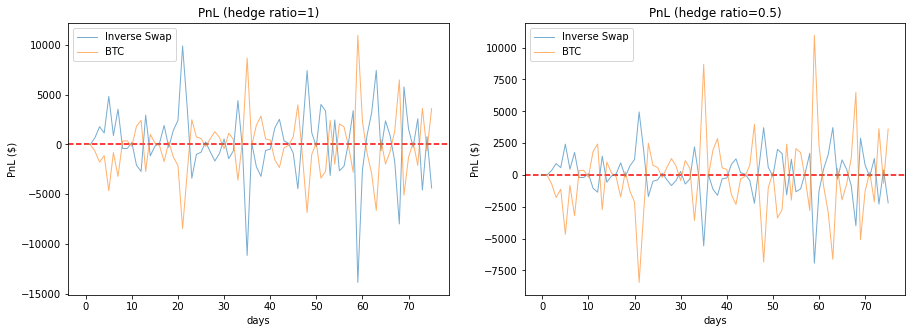

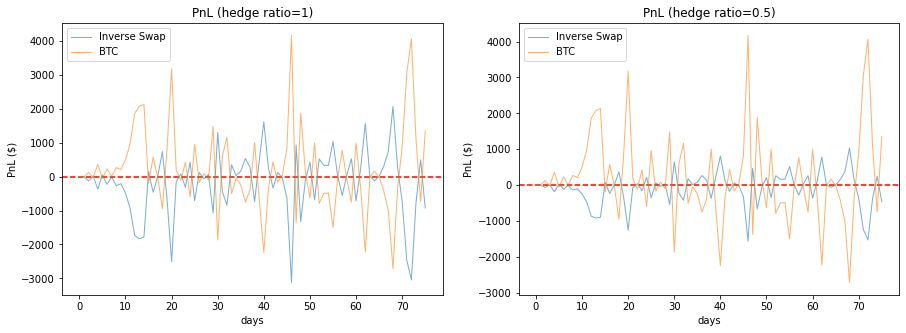

In [157]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plot_pnl(hedge11,pnl_asset_list_2,1,date_list2)
plt.subplot(122)
plot_pnl(hedge22,pnl_asset_list_2,0.5,date_list2)

plt.figure(figsize=(15,5))
plt.subplot(121)
plot_pnl(hedge1,pnl_asset_list,1,date_list)
plt.subplot(122)
plot_pnl(hedge2,pnl_asset_list,0.5,date_list)
